# SeqTech 2022 - Scanpy Tutorial

**Tips:**

    - select a cell and shift-Enter to execute it
    - Remember to execute cells in order!
    - If you run a cell and you get an error message about something not being defined, you probably ran things out of order

In [5]:
import pandas as pd
import os, glob, sys
import matplotlib.pyplot as pl
import seaborn as sns
import numpy as np
import scipy

import scanpy as sc
import gtfparse
#import scrublet as scr

from IPython.display import Image
from IPython.core.display import HTML 

#Set some default figure parameters
sc.settings.set_figure_params(dpi=80, color_map="Reds", figsize=[4,4])

#Scanpy verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.verbosity = 3

# Print which versions of the dependencies we are running
sc.logging.print_header()

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.5 scipy==1.9.1 pandas==1.4.4 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.10.2 pynndescent==0.5.8


In [7]:
%config InlineBackend.figure_format='retina'


<img align="left" src="https://scanpy.readthedocs.io/en/stable/_static/Scanpy_Logo_BrightFG.svg" width=400 />  

This tutorial will make heavy use of "Scanpy" single-cell analysis package for Python.  
https://scanpy.readthedocs.io/en/stable/

# Download the Course Data

There should be a folder called 'data/' in this directory containing the Cellranger outputs from your samples collected in the lab.

In [9]:
# check to make sure you see the 'data' folder
os.listdir()

['data',
 '.ipynb_checkpoints',
 'chipseq_data',
 '._Nov16',
 'SeqTech22_Data_Exploration.ipynb',
 'ensembl-vep',
 'data.tar.gz']

In [11]:
# check the contents of the 'data' folder. 
# There are a couple of ways to view the contents of folders in Python.
# Note that using 'os', we saw some ugly hidden files (eg, '.DS_Store') carried over from my Mac
# 'glob' is another usful module, mainly for grabbing multiple files at a time... in a glob
# glob natively ignores ugly hidden file types, 

glob.glob('*')

['data',
 'chipseq_data',
 'SeqTech22_Data_Exploration.ipynb',
 'ensembl-vep',
 'data.tar.gz']

In [12]:
# What is in the data folder?
glob.glob('data/*')

['data/example_FASTQ',
 'data/Intestine',
 'data/GEO_data',
 'data/Pandas_exercise',
 'data/Cell_Culture',
 'data/GTF']

In [14]:
# We have datasets from a few different types of experiments.  
path = 'data/Cell_Culture/'
glob.glob(path + '*')

['data/Cell_Culture/Preall_CR01_H_plus',
 'data/Cell_Culture/Preall_CR01_H_neg',
 'data/Cell_Culture/Preall_CR01_S_plus',
 'data/Cell_Culture/Preall_CR01_S_neg']

In [15]:
csv_files = glob.glob(path + '*/outs/*.csv')
csv_files

['data/Cell_Culture/Preall_CR01_H_plus/outs/metrics_summary.csv',
 'data/Cell_Culture/Preall_CR01_H_neg/outs/metrics_summary.csv',
 'data/Cell_Culture/Preall_CR01_S_plus/outs/metrics_summary.csv',
 'data/Cell_Culture/Preall_CR01_S_neg/outs/metrics_summary.csv']

In [16]:

summ = pd.concat(
    [pd.read_csv(c) for c in csv_files]
    )
summ.index = [name.split('/')[2] for name in csv_files]
summ

Estimated Number of Cells Mean Reads per Cell  \
Preall_CR01_H_plus                     2,720              47,481   
Preall_CR01_H_neg                      3,835              28,421   
Preall_CR01_S_plus                     4,097              27,430   
Preall_CR01_S_neg                      4,500              26,737   

                   Median Genes per Cell Number of Reads Valid Barcodes  \
Preall_CR01_H_plus                 3,714     129,149,531          98.4%   
Preall_CR01_H_neg                  2,857     108,995,465          98.3%   
Preall_CR01_S_plus                 3,146     112,379,311          98.3%   
Preall_CR01_S_neg                  3,008     120,314,986          98.3%   

                   Sequencing Saturation Q30 Bases in Barcode  \
Preall_CR01_H_plus                 45.0%                95.4%   
Preall_CR01_H_neg                  38.5%                95.5%   
Preall_CR01_S_plus                 43.6%                95.5%   
Preall_CR01_S_neg                  44.6%                95.5%   

                   Q30 Bases in RNA Read Q30 Bases in UMI  \
Preall_CR01_H_plus                 95.2%            95.5%   
Preall_CR01_H_neg                  95.3%            95.6%   
Preall_CR01_S_plus                 95.3%            95.6%   
Preall_CR01_S_neg                  95.4%            95.6%   

                   Reads Mapped to Genome Reads Mapped Confidently to Genome  \
Preall_CR01_H_plus                  97.5%                              94.9%   
Preall_CR01_H_neg                   97.3%                              94.9%   
Preall_CR01_S_plus                  96.8%                              94.1%   
Preall_CR01_S_neg                   97.3%                              94.3%   

                   Reads Mapped Confidently to Intergenic Regions  \
Preall_CR01_H_plus                                           4.4%   
Preall_CR01_H_neg                                            4.5%   
Preall_CR01_S_plus                                           3.3%   
Preall_CR01_S_neg                                            3.6%   

                   Reads Mapped Confidently to Intronic Regions  \
Preall_CR01_H_plus                                        13.8%   
Preall_CR01_H_neg                                         15.2%   
Preall_CR01_S_plus                                        17.3%   
Preall_CR01_S_neg                                         20.1%   

                   Reads Mapped Confidently to Exonic Regions  \
Preall_CR01_H_plus                                      76.7%   
Preall_CR01_H_neg                                       75.2%   
Preall_CR01_S_plus                                      73.4%   
Preall_CR01_S_neg                                       70.6%   

                   Reads Mapped Confidently to Transcriptome  \
Preall_CR01_H_plus                                     73.8%   
Preall_CR01_H_neg                                      72.2%   
Preall_CR01_S_plus                                     70.4%   
Preall_CR01_S_neg                                      67.5%   

                   Reads Mapped Antisense to Gene Fraction Reads in Cells  \
Preall_CR01_H_plus                           1.3%                   90.4%   
Preall_CR01_H_neg                            1.2%                   95.8%   
Preall_CR01_S_plus                           1.4%                   91.6%   
Preall_CR01_S_neg                            1.4%                   94.3%   

                   Total Genes Detected Median UMI Counts per Cell  
Preall_CR01_H_plus               20,585                     16,788  
Preall_CR01_H_neg                20,753                     10,596  
Preall_CR01_S_plus               21,175                      9,408  
Preall_CR01_S_neg                21,629                      8,394

## Import the filtered gene expression matrix

Cellranger outputs its matrix in two formats: **MTX** and **HDF5**

**MTX** formatted data must come as a bundle of 3 files:

    - the actual matrix (matrix.mtx.gz). Basically just a long string of numbers in a sparse format.
    - the list of barcodes (barcodes.tsv.gz)
    - the list of gene/feature names (features.tsv.gz)
    
**HDF5** is a container format that packages all this and more. 

In [30]:
h5_files = glob.glob('data/Cell_Culture/*/outs/filt*h5')
h5_file = h5_files[0]
h5_file

'data/Cell_Culture/Preall_CR01_H_plus/outs/filtered_feature_bc_matrix.h5'

In [31]:
adata = sc.read_10x_h5(h5_file)

reading data/Cell_Culture/Preall_CR01_H_plus/outs/filtered_feature_bc_matrix.h5
 (0:00:00)


/home/ubuntu/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [53]:
pd.Series(
    adata\
    .var\
    .index\
    .duplicated()
    ).value_counts()

False    36591
True        10
dtype: int64

In [54]:
adata.var[adata.var.index.duplicated()]

gene_ids    feature_types  genome
TBCE            ENSG00000284770  Gene Expression  GRCh38
LINC01238       ENSG00000261186  Gene Expression  GRCh38
CYB561D2        ENSG00000271858  Gene Expression  GRCh38
MATR3           ENSG00000015479  Gene Expression  GRCh38
LINC01505       ENSG00000234229  Gene Expression  GRCh38
HSPA14          ENSG00000187522  Gene Expression  GRCh38
GOLGA8M         ENSG00000261480  Gene Expression  GRCh38
GGT1            ENSG00000100031  Gene Expression  GRCh38
ARMCX5-GPRASP2  ENSG00000286237  Gene Expression  GRCh38
TMSB15B         ENSG00000269226  Gene Expression  GRCh38

In [57]:
adata.var_names_make_unique()

In [59]:
adata.var.index.duplicated().any()

False

In [62]:
adata.obs

Empty DataFrame
Columns: []
Index: [AAACCCAAGGTGTGAC-1, AAACCCAAGTGTAGTA-1, AAACCCATCCGGACTG-1, AAACGAACAATGAAAC-1, AAACGAATCGAGAATA-1, AAACGCTAGTGGCGAT-1, AAACGCTTCTCGACGG-1, AAACGCTTCTGAACGT-1, AAAGAACCACGCGCAT-1, AAAGAACTCATGCGGC-1, AAAGGATCATGTGGCC-1, AAAGGATGTTCGGCCA-1, AAAGGGCAGCCTGAGA-1, AAAGGGCGTAGGTCAG-1, AAAGGGCGTCATAGTC-1, AAAGGTAAGGGTCAAC-1, AAAGGTAGTTCTCTCG-1, AAAGTCCCAGGTTTAC-1, AAAGTCCGTAACAGGC-1, AAAGTCCGTAACCCTA-1, AAAGTCCGTACCTTCC-1, AAAGTCCTCCAAGCAT-1, AAAGTCCTCGCATAGT-1, AAAGTGAGTGTTGACT-1, AAAGTGATCTAGGCAT-1, AAATGGACACTCACTC-1, AAATGGATCGGTCGAC-1, AACAAAGAGCATTTCG-1, AACAAAGTCAGGAAGC-1, AACAAAGTCAGGACAG-1, AACAAAGTCTAGACCA-1, AACAAGACAACGAGGT-1, AACAAGACAGAACTTC-1, AACACACAGGGTCACA-1, AACACACAGTAAACTG-1, AACAGGGAGACAACAT-1, AACAGGGAGTTAGTGA-1, AACAGGGCACATTGTG-1, AACAGGGCAGGATTCT-1, AACAGGGCATAGGAGC-1, AACAGGGGTCGGCCTA-1, AACAGGGTCTGCTTAT-1, AACCAACTCGTTCGCT-1, AACCAACTCTACTTCA-1, AACCACAAGCAAGTGC-1, AACCACAGTTGGCCTG-1, AACCATGAGATGCTAA-1, AACCATGTCGGCACTG-1, AACCCAACATTAAGCC-1, AACCCAAGTACTGAGG-1, AACCCAATCTAGCCTC-1, AACCTGAGTCCCAAAT-1, AACCTGATCCACTGGG-1, AACCTTTAGCAGGTCA-1, AACCTTTCAAGCTGTT-1, AACCTTTTCGCCTAGG-1, AACGGGAAGAACGTGC-1, AACGGGACAATTGCGT-1, AACGGGACACCAGGTC-1, AACGTCAGTGTCATCA-1, AACGTCATCACACCGG-1, AACGTCATCATAGGCT-1, AACTTCTGTGATGAAT-1, AAGAACAGTCGCATTA-1, AAGACAACAGTATGAA-1, AAGACAAGTTCCATTT-1, AAGACAATCTCCATAT-1, AAGACTCAGCATCTTG-1, AAGACTCGTACGCTAT-1, AAGACTCGTCCGGTCA-1, AAGACTCTCAACACCA-1, AAGATAGGTACCATAC-1, AAGATAGTCAACACCA-1, AAGCATCAGTCATCCA-1, AAGCATCAGTGCGCTC-1, AAGCATCCAAGCGCTC-1, AAGCATCCAATCTCTT-1, AAGCCATAGCTCGTGC-1, AAGCCATAGTGCACCC-1, AAGCCATCACCGTGGT-1, AAGCCATGTAGACGGT-1, AAGCCATGTATAATGG-1, AAGCCATTCTTCTAAC-1, AAGCGAGAGATGGTCG-1, AAGCGAGTCCAACACA-1, AAGCGAGTCTCCGAAA-1, AAGCGTTTCGGTCACG-1, AAGGAATGTAGTCTTG-1, AAGGAATTCAACACCA-1, AAGGAATTCATTCATC-1, AAGGTAACAAAGGGCT-1, AAGGTAAGTGGTTTGT-1, AAGGTAATCACCTTGC-1, AAGTTCGCATCCGCGA-1, AAGTTCGGTAGCTTTG-1, AAGTTCGGTCAAACGG-1, AAGTTCGGTGACGCCT-1, AAGTTCGTCGTAGCTA-1, AATAGAGGTATCAGGG-1, AATAGAGGTTCTCCTG-1, ...]

[2720 rows x 0 columns]

In [64]:
def concat_h5_GEX(list_of_h5s, join='outer'):
    """
    Feed in a list of paths to .hdf5-format Cellranger matrix files
    Returns: Scanpy (AnnData) object with all samples concatenated
    """
    merged_uns = {}
    
    for n,h5 in enumerate(list_of_h5s):
        tmp = sc.read_10x_h5(h5) # creates temporary scanpy object
        tmp.var_names_make_unique()
        LIBRARY_ID = h5s[n].split('/')[-3]
        tmp.obs.index = tmp.obs.index + '-' + LIBRARY_ID
        tmp.obs['Sample'] = LIBRARY_ID
        
        if n == 0:
            adata = tmp.copy()
        else:
            adata = adata.concatenate(tmp, 
            batch_key=None, 
            index_unique=None, 
            join=join,
            )
    adata.uns['Sample_Metadata'] = merged_uns
            
    return adata

In [66]:
# Create a list of paths to the h5 files we would like to load in and concatenate
h5s = glob.glob('data/Cell_Culture/*/outs/filt*h5')
h5s

['data/Cell_Culture/Preall_CR01_H_plus/outs/filtered_feature_bc_matrix.h5',
 'data/Cell_Culture/Preall_CR01_H_neg/outs/filtered_feature_bc_matrix.h5',
 'data/Cell_Culture/Preall_CR01_S_plus/outs/filtered_feature_bc_matrix.h5',
 'data/Cell_Culture/Preall_CR01_S_neg/outs/filtered_feature_bc_matrix.h5']

In [67]:
# Read in both data matrices to generate a new AnnData object with both samples
adata = concat_h5_GEX(h5s)

reading data/Cell_Culture/Preall_CR01_H_plus/outs/filtered_feature_bc_matrix.h5
 (0:00:00)
reading data/Cell_Culture/Preall_CR01_H_neg/outs/filtered_feature_bc_matrix.h5


/home/ubuntu/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)


/home/ubuntu/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


reading data/Cell_Culture/Preall_CR01_S_plus/outs/filtered_feature_bc_matrix.h5


/home/ubuntu/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


 (0:00:00)


/home/ubuntu/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


reading data/Cell_Culture/Preall_CR01_S_neg/outs/filtered_feature_bc_matrix.h5


/home/ubuntu/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


 (0:00:00)


/home/ubuntu/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/ubuntu/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [69]:
adata.obs

Sample
AAACCCAAGGTGTGAC-1-Preall_CR01_H_plus  Preall_CR01_H_plus
AAACCCAAGTGTAGTA-1-Preall_CR01_H_plus  Preall_CR01_H_plus
AAACCCATCCGGACTG-1-Preall_CR01_H_plus  Preall_CR01_H_plus
AAACGAACAATGAAAC-1-Preall_CR01_H_plus  Preall_CR01_H_plus
AAACGAATCGAGAATA-1-Preall_CR01_H_plus  Preall_CR01_H_plus
...                                                   ...
TTTGGTTGTGGCCCAT-1-Preall_CR01_S_neg    Preall_CR01_S_neg
TTTGTTGAGGAGAGGC-1-Preall_CR01_S_neg    Preall_CR01_S_neg
TTTGTTGCAAAGCAAT-1-Preall_CR01_S_neg    Preall_CR01_S_neg
TTTGTTGTCAAGCGTT-1-Preall_CR01_S_neg    Preall_CR01_S_neg
TTTGTTGTCTCTGCCA-1-Preall_CR01_S_neg    Preall_CR01_S_neg

[15152 rows x 1 columns]

## AnnData Objects
As a refresher, this is the structure of the AnnData object at the core of your Scanpy project:

<img src="https://anndata.readthedocs.io/en/latest/_images/anndata_schema.svg" width=400 />

Take a peek at what is in each annotation dataframe:  
First, the <b>.obs</b> dataframe, which stores metadata about each <u>cell</u>

In [70]:
adata.obs.head()

Sample
AAACCCAAGGTGTGAC-1-Preall_CR01_H_plus  Preall_CR01_H_plus
AAACCCAAGTGTAGTA-1-Preall_CR01_H_plus  Preall_CR01_H_plus
AAACCCATCCGGACTG-1-Preall_CR01_H_plus  Preall_CR01_H_plus
AAACGAACAATGAAAC-1-Preall_CR01_H_plus  Preall_CR01_H_plus
AAACGAATCGAGAATA-1-Preall_CR01_H_plus  Preall_CR01_H_plus

Next, the <b>.var</b> dataframe, which stores metadata about each <u>gene</u>


In [71]:
adata.var.head()

gene_ids    feature_types  genome
MIR1302-2HG  ENSG00000243485  Gene Expression  GRCh38
FAM138A      ENSG00000237613  Gene Expression  GRCh38
OR4F5        ENSG00000186092  Gene Expression  GRCh38
AL627309.1   ENSG00000238009  Gene Expression  GRCh38
AL627309.3   ENSG00000239945  Gene Expression  GRCh38

### QUIZ!
#### How many cells are there in each sample?

In [74]:
# Hint: There is a great one-liner for this 
adata.obs['Sample'].value_counts()


Preall_CR01_S_neg     4500
Preall_CR01_S_plus    4097
Preall_CR01_H_neg     3835
Preall_CR01_H_plus    2720
Name: Sample, dtype: int64

### Start annotating
**Firstly, let's stash the raw digital gene counts data in a layer called 'counts':**



AnnData objects by default store their core numerical data in an attribute called '.X'
When we first read in the matrix, 'adata.X' is populated with the raw counts, but as we preprocess and manipulate the data, this will be transformed. Best to stash the raw counts somewhere in case we want to access them again later.

Thankfully, AnnData has the ability to save arbitrarily many data matrices as 'layers', provided they have the same shape as the overall object (that is, it must be a full matrix that spans every gene and cell in the dataset)

In practice, layers can be used to store all kinds of transformations of the original data.  Normalizations, logarithmized versions, etc.  They are also often used to store spliced and non-spliced read counts, ie. for RNA velocity analysis.

In [75]:
# Let's look at what is currently stored in .X:
adata.X

<15152x36601 sparse matrix of type '<class 'numpy.float32'>'
	with 47316530 stored elements in Compressed Sparse Row format>

As you can see, adata.X is a sparse matrix. This is a memory-efficient type of numerical array that can be read and manipulated using Python's "SciPy" library, which is called in the background by Scanpy. You can also see that it is stored as a 32-bit floating-point number, which is a little odd considering these data are currently integer counts. It's not a big deal, but for memory and disk-space efficiency, you should sometimes think about whether the datatype being used to represent your data is the right choice.

In [77]:
# Let's stash the raw counts as integers.  
# Remember to call .copy() -- this ensures that the new thing being created isn't 
# just a passive pointer to the original data, but is in fact a completely separate new object.
adata.layers['counts'] = adata.X.astype('int').copy()

# Check that we have added the new layer:
print(adata.layers)


Layers with keys: counts


In [78]:
adata.layers['counts']

<15152x36601 sparse matrix of type '<class 'numpy.int64'>'
	with 47316530 stored elements in Compressed Sparse Row format>

## Cell-level metadata

Any per-cell annotation is stored in the **.obs** dataframe. This is a standard Pandas dataframe that can store cell type labels, numerical measures like UMI counts, sample metadata, or basically anything you might store in an Excel spreadsheet.

In [79]:
# Let's save a count of how many UMIs and unique genes are found in each cell:
# We will use Numpy for this simple math step
# The .A1 at the end reformats the data into a single 1-D flat array, rather than as a 1x5404 vertical stack.  
# This is a dumb annoying thing about how Numpy arrays work

adata.obs['n_counts'] = np.sum(adata.layers['counts'], axis=1).A1

# Let's also save a count of the number of unique genes found in each cell:
# This counts how many genes have a UMI count > 0
adata.obs['n_genes'] = np.sum(adata.layers['counts'] > 0, axis=1).A1

# For good measure, let's also sort the UMI counts in log space
adata.obs['log(UMIs)'] = np.log10(adata.obs['n_counts'])

In [80]:
# Let's see what that just added:
adata.obs[:5]

Sample  n_counts  n_genes  \
AAACCCAAGGTGTGAC-1-Preall_CR01_H_plus  Preall_CR01_H_plus     20865     4195   
AAACCCAAGTGTAGTA-1-Preall_CR01_H_plus  Preall_CR01_H_plus     20875     4176   
AAACCCATCCGGACTG-1-Preall_CR01_H_plus  Preall_CR01_H_plus     41960     6042   
AAACGAACAATGAAAC-1-Preall_CR01_H_plus  Preall_CR01_H_plus     25528     4211   
AAACGAATCGAGAATA-1-Preall_CR01_H_plus  Preall_CR01_H_plus     19570     3667   

                                       log(UMIs)  
AAACCCAAGGTGTGAC-1-Preall_CR01_H_plus   4.319418  
AAACCCAAGTGTAGTA-1-Preall_CR01_H_plus   4.319626  
AAACCCATCCGGACTG-1-Preall_CR01_H_plus   4.622835  
AAACGAACAATGAAAC-1-Preall_CR01_H_plus   4.407017  
AAACGAATCGAGAATA-1-Preall_CR01_H_plus   4.291591

#### Organellar RNAs

In mammalian systems, it is useful to track potentially dead or low-quality cells by looking at the fraction of reads coming from the mitochondrial genome.  This is because when a cell is dying, the plasma membrane permeabilizes and releases cellular mRNAs in the the medium or exposes them to RNA degradation. Meanwhile, RNAs stuck in the mitochondria are protected until the bitter end.  

**How can we figure out which genes in our matrix are encoded by the mitochondrial or chloroplast genomes?**

Simple: let's look at the GTF file!  I conveniently included it in the 'data/GTF/' directory

In [502]:
gtffile = 'data/GTF/GRCh38_2020-A.gtf.gz'
#gtffile = 'data/genes.gtf.gz'

# Read in the GTF file using the installed package 'gtfparse'.
# It doesn't do anything fancy except shortcut some annoying parsing steps via Pandas

gtf = gtfparse.read_gtf(gtffile)

# View the first few lines of the table
gtf[:3]

/opt/miniconda3/lib/python3.8/site-packages/gtfparse/read_gtf.py:82: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chunk_iterator = pd.read_csv(
/opt/miniconda3/lib/python3.8/site-packages/gtfparse/read_gtf.py:82: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chunk_iterator = pd.read_csv(
INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'gene_type', 'gene_name', 'level', 'hgnc_id', 'tag', 'havana_gene', 'transcript_id', 'transcript_version', 'transcript_type', 'transcript_name', 'transcript_support_level', 'havana_transcript', 'exon_number', 'exon_id', 'exon_version', 'protein_id', 'ccdsid', 'ont']


seqname  source     feature  start    end  score strand frame  \
0    chr1  HAVANA        gene  29554  31109    NaN      +     0   
1    chr1  HAVANA  transcript  29554  31097    NaN      +     0   
2    chr1  HAVANA        exon  29554  30039    NaN      +     0   

           gene_id gene_version  ... transcript_type  transcript_name  \
0  ENSG00000243485            5  ...                                    
1  ENSG00000243485            5  ...          lncRNA  MIR1302-2HG-202   
2  ENSG00000243485            5  ...          lncRNA  MIR1302-2HG-202   

  transcript_support_level     havana_transcript exon_number          exon_id  \
0                                                                               
1                        5  OTTHUMT00000002840.1                                
2                        5  OTTHUMT00000002840.1           1  ENSE00001947070   

  exon_version protein_id ccdsid ont  
0                                     
1                                     
2            1                        

[3 rows x 28 columns]

In this GTF file, 'seqname' corresponds to the name of the chromosome or genomic scaffold housing the gene.  Let's see what the breakdown of these are in this annotation.  

In [40]:
# Use Pandas' almighty .value_counts() method to check how many genes come from each chromosome
gtf['seqname'].value_counts()

chr1          253174
chr2          207215
chr3          179413
chr17         167295
chr19         165827
chr11         165140
chr12         160820
chr7          130774
chr16         128328
chr6          126583
chr5          124063
chr4          117583
chr10         102227
chr8          101007
chr15         100916
chr14          96559
chr9           95353
chrX           88055
chr20          64954
chr22          58617
chr18          50374
chr13          44366
chr21          31164
chrY            5468
KI270711.1       151
KI270728.1       114
KI270734.1        92
KI270727.1        75
chrM              71
GL000213.1        49
GL000194.1        26
GL000195.1        24
KI270721.1        16
KI270713.1        15
GL000205.2        14
GL000219.1        13
KI270726.1        11
GL000218.1         8
GL000009.2         8
KI270731.1         7
Name: seqname, dtype: int64

In [41]:
gtf

seqname   source     feature   start     end  score strand frame  \
0              chr1   HAVANA        gene   29554   31109    NaN      +     0   
1              chr1   HAVANA  transcript   29554   31097    NaN      +     0   
2              chr1   HAVANA        exon   29554   30039    NaN      +     0   
3              chr1   HAVANA        exon   30564   30667    NaN      +     0   
4              chr1   HAVANA        exon   30976   31097    NaN      +     0   
...             ...      ...         ...     ...     ...    ...    ...   ...   
2765964  KI270734.1  ENSEMBL         CDS  138483  138667    NaN      -     2   
2765965  KI270734.1  ENSEMBL  stop_codon  138480  138482    NaN      -     0   
2765966  KI270734.1  ENSEMBL         UTR  161689  161852    NaN      -     0   
2765967  KI270734.1  ENSEMBL         UTR  161587  161626    NaN      -     0   
2765968  KI270734.1  ENSEMBL         UTR  138082  138482    NaN      -     0   

                 gene_id gene_version  ... transcript_type  transcript_name  \
0        ENSG00000243485            5  ...                                    
1        ENSG00000243485            5  ...          lncRNA  MIR1302-2HG-202   
2        ENSG00000243485            5  ...          lncRNA  MIR1302-2HG-202   
3        ENSG00000243485            5  ...          lncRNA  MIR1302-2HG-202   
4        ENSG00000243485            5  ...          lncRNA  MIR1302-2HG-202   
...                  ...          ...  ...             ...              ...   
2765964  ENSG00000277196            4  ...  protein_coding   AC007325.2-201   
2765965  ENSG00000277196            4  ...  protein_coding   AC007325.2-201   
2765966  ENSG00000277196            4  ...  protein_coding   AC007325.2-201   
2765967  ENSG00000277196            4  ...  protein_coding   AC007325.2-201   
2765968  ENSG00000277196            4  ...  protein_coding   AC007325.2-201   

        transcript_support_level     havana_transcript exon_number  \
0                                                                    
1                              5  OTTHUMT00000002840.1               
2                              5  OTTHUMT00000002840.1           1   
3                              5  OTTHUMT00000002840.1           2   
4                              5  OTTHUMT00000002840.1           3   
...                          ...                   ...         ...   
2765964                        1                                15   
2765965                        1                                15   
2765966                        1                                 1   
2765967                        1                                 2   
2765968                        1                                15   

                 exon_id exon_version         protein_id ccdsid ont  
0                                                                    
1                                                                    
2        ENSE00001947070            1                                
3        ENSE00001922571            1                                
4        ENSE00001827679            1                                
...                  ...          ...                ...    ...  ..  
2765964  ENSE00003753010            1  ENSP00000481127.1             
2765965  ENSE00003753010            1  ENSP00000481127.1             
2765966  ENSE00003746084            1  ENSP00000481127.1             
2765967  ENSE00003719550            1  ENSP00000481127.1             
2765968  ENSE00003753010            1  ENSP00000481127.1             

[2765969 rows x 28 columns]

Let's save a few of these gene annotation features into a new dataframe for later.  We will merge them into the Scanpy object in case we want to explore gene expression based on their chromosomal location, or average gene length, or strand, or some such thing

In [42]:
# Use the Pandas dataframe 'query' method to filter out only rows annotating genes
gene_anno = gtf.query(
    'feature == "gene"')\
    .set_index('gene_id')\
    .loc[:,['seqname','start','end','strand','frame','gene_name']]

gene_anno[:3]

seqname  start    end strand frame    gene_name
gene_id                                                        
ENSG00000243485    chr1  29554  31109      +     0  MIR1302-2HG
ENSG00000237613    chr1  34554  36081      -     0      FAM138A
ENSG00000186092    chr1  65419  71585      +     0        OR4F5

Note that many of these features are blank in their gene_name column (but not all of them).  Y'all need to name your genes, Maizefolks! When Cellranger is counting genes, it assigns a read to its corresponding mapped gene, and uses the gene_name column as the feature name, if available.  If not, it defaults to the gene_id column.  Thus, our gene names in our Cellranger data matrix are going to be a confusing mixture of entries from the gene_name column and the gene_id column.

In [44]:
# you can also slice a Pandas dataframe like this:

Mt_df = gene_anno[gene_anno['seqname'] == 'chrM'] # Mitochondrial genes
# For plant people, mitochondrial and chloroplast chromosomes are called 'Mt' and 'Pt'
#Mt_df = gene_anno[gene_anno['seqname'] == 'Mt'] # Mitochondrial genes
#Pt_df = gene_anno[gene_anno['seqname'] == 'Pt'] # Chloroplast genes

Mt_df

seqname  start    end strand frame gene_name
gene_id                                                     
ENSG00000198888    chrM   3307   4262      +     0    MT-ND1
ENSG00000198763    chrM   4470   5511      +     0    MT-ND2
ENSG00000198804    chrM   5904   7445      +     0    MT-CO1
ENSG00000198712    chrM   7586   8269      +     0    MT-CO2
ENSG00000228253    chrM   8366   8572      +     0   MT-ATP8
ENSG00000198899    chrM   8527   9207      +     0   MT-ATP6
ENSG00000198938    chrM   9207   9990      +     0    MT-CO3
ENSG00000198840    chrM  10059  10404      +     0    MT-ND3
ENSG00000212907    chrM  10470  10766      +     0   MT-ND4L
ENSG00000198886    chrM  10760  12137      +     0    MT-ND4
ENSG00000198786    chrM  12337  14148      +     0    MT-ND5
ENSG00000198695    chrM  14149  14673      -     0    MT-ND6
ENSG00000198727    chrM  14747  15887      +     0    MT-CYB

as it turns out, there would have been a much easier trick to get these genes directly from your dataset.  
Notice how all the mitochondrial gene names conveniently start with the prefix 'MT-'


In [47]:
# Slice the .var dataframe using string methods
adata.var[adata.var.index.str.startswith('MT-')]

gene_ids    feature_types  genome
MT-ND1   ENSG00000198888  Gene Expression  GRCh38
MT-ND2   ENSG00000198763  Gene Expression  GRCh38
MT-CO1   ENSG00000198804  Gene Expression  GRCh38
MT-CO2   ENSG00000198712  Gene Expression  GRCh38
MT-ATP8  ENSG00000228253  Gene Expression  GRCh38
MT-ATP6  ENSG00000198899  Gene Expression  GRCh38
MT-CO3   ENSG00000198938  Gene Expression  GRCh38
MT-ND3   ENSG00000198840  Gene Expression  GRCh38
MT-ND4L  ENSG00000212907  Gene Expression  GRCh38
MT-ND4   ENSG00000198886  Gene Expression  GRCh38
MT-ND5   ENSG00000198786  Gene Expression  GRCh38
MT-ND6   ENSG00000198695  Gene Expression  GRCh38
MT-CYB   ENSG00000198727  Gene Expression  GRCh38

In [82]:
# Method 1:
# Using list comprehension
print('Using list comprehension')
mito_genes = [i for i in adata.var_names if i.startswith('MT-')]
print(mito_genes)
print()

# Using slicing, as above:
mito_genes_slicing = adata.var[adata.var.index.str.startswith('MT-')].index.tolist()
print('Calling string methods and using slicing on the .var index:')
print(mito_genes_slicing)
print()
    
    
# Method 2:


# f-strings are totally rad.
print(f'Are these two lists the same? {mito_genes == mito_genes_slicing}')


Using list comprehension
['MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB']

Calling string methods and using slicing on the .var index:
['MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB']

Are these two lists the same? True


In [84]:
# Now, use these lists to compute the fraction of each transcriptome coming from that organelle:

mito_counts = np.sum(adata[:, mito_genes].layers['counts'], axis=1).A1
total_counts = np.sum(adata.layers['counts'], axis=1).A1

adata.obs['frac_mito'] = mito_counts / total_counts

# You *could* just do this all in one big long line:
#adata.obs['frac_mito'] = np.sum(adata[:, mito_genes].layers['counts'], axis=1).A1 \
#                        / np.sum(adata.layers['counts'], axis=1).A1

# Python 3.8's "walrus" operator
#adata.obs['frac_mito'] = (mito_counts := np.sum(adata[:, mito_genes].layers['counts'], axis=1).A1)\
#                        / (total_counts := np.sum(adata.layers['counts'], axis=1).A1)

adata.obs

Sample  n_counts  n_genes  \
AAACCCAAGGTGTGAC-1-Preall_CR01_H_plus  Preall_CR01_H_plus     20865     4195   
AAACCCAAGTGTAGTA-1-Preall_CR01_H_plus  Preall_CR01_H_plus     20875     4176   
AAACCCATCCGGACTG-1-Preall_CR01_H_plus  Preall_CR01_H_plus     41960     6042   
AAACGAACAATGAAAC-1-Preall_CR01_H_plus  Preall_CR01_H_plus     25528     4211   
AAACGAATCGAGAATA-1-Preall_CR01_H_plus  Preall_CR01_H_plus     19570     3667   
...                                                   ...       ...      ...   
TTTGGTTGTGGCCCAT-1-Preall_CR01_S_neg    Preall_CR01_S_neg     21273     5510   
TTTGTTGAGGAGAGGC-1-Preall_CR01_S_neg    Preall_CR01_S_neg      5728     2313   
TTTGTTGCAAAGCAAT-1-Preall_CR01_S_neg    Preall_CR01_S_neg     13705     4088   
TTTGTTGTCAAGCGTT-1-Preall_CR01_S_neg    Preall_CR01_S_neg     11473     3581   
TTTGTTGTCTCTGCCA-1-Preall_CR01_S_neg    Preall_CR01_S_neg     12721     3996   

                                       log(UMIs)  frac_mito  
AAACCCAAGGTGTGAC-1-Preall_CR01_H_plus   4.319418   0.082818  
AAACCCAAGTGTAGTA-1-Preall_CR01_H_plus   4.319626   0.042874  
AAACCCATCCGGACTG-1-Preall_CR01_H_plus   4.622835   0.087512  
AAACGAACAATGAAAC-1-Preall_CR01_H_plus   4.407017   0.040896  
AAACGAATCGAGAATA-1-Preall_CR01_H_plus   4.291591   0.078232  
...                                          ...        ...  
TTTGGTTGTGGCCCAT-1-Preall_CR01_S_neg    4.327829   0.010013  
TTTGTTGAGGAGAGGC-1-Preall_CR01_S_neg    3.758003   0.025489  
TTTGTTGCAAAGCAAT-1-Preall_CR01_S_neg    4.136879   0.041591  
TTTGTTGTCAAGCGTT-1-Preall_CR01_S_neg    4.059677   0.030071  
TTTGTTGTCTCTGCCA-1-Preall_CR01_S_neg    4.104521   0.031759  

[15152 rows x 5 columns]

In [85]:
def frac_mito(adata):
    mito_genes = [name for name in adata.var_names if name.upper().startswith('MT-')]
    
    try:
        mito_counts = np.sum(adata[:, mito_genes].layers['counts'], axis=1).A1
        total_counts = np.sum(adata.layers['counts'], axis=1).A1
        
    except KeyError:
        print('Warning: No counts layer detected, using .X layer instead and hoping for the best...?')
        mito_counts = np.sum(adata[:, mito_genes].X, axis=1).A1
        total_counts = np.sum(adata.X, axis=1).A1
    
    adata.obs['frac_mito'] = mito_counts / total_counts

... storing 'Sample' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical


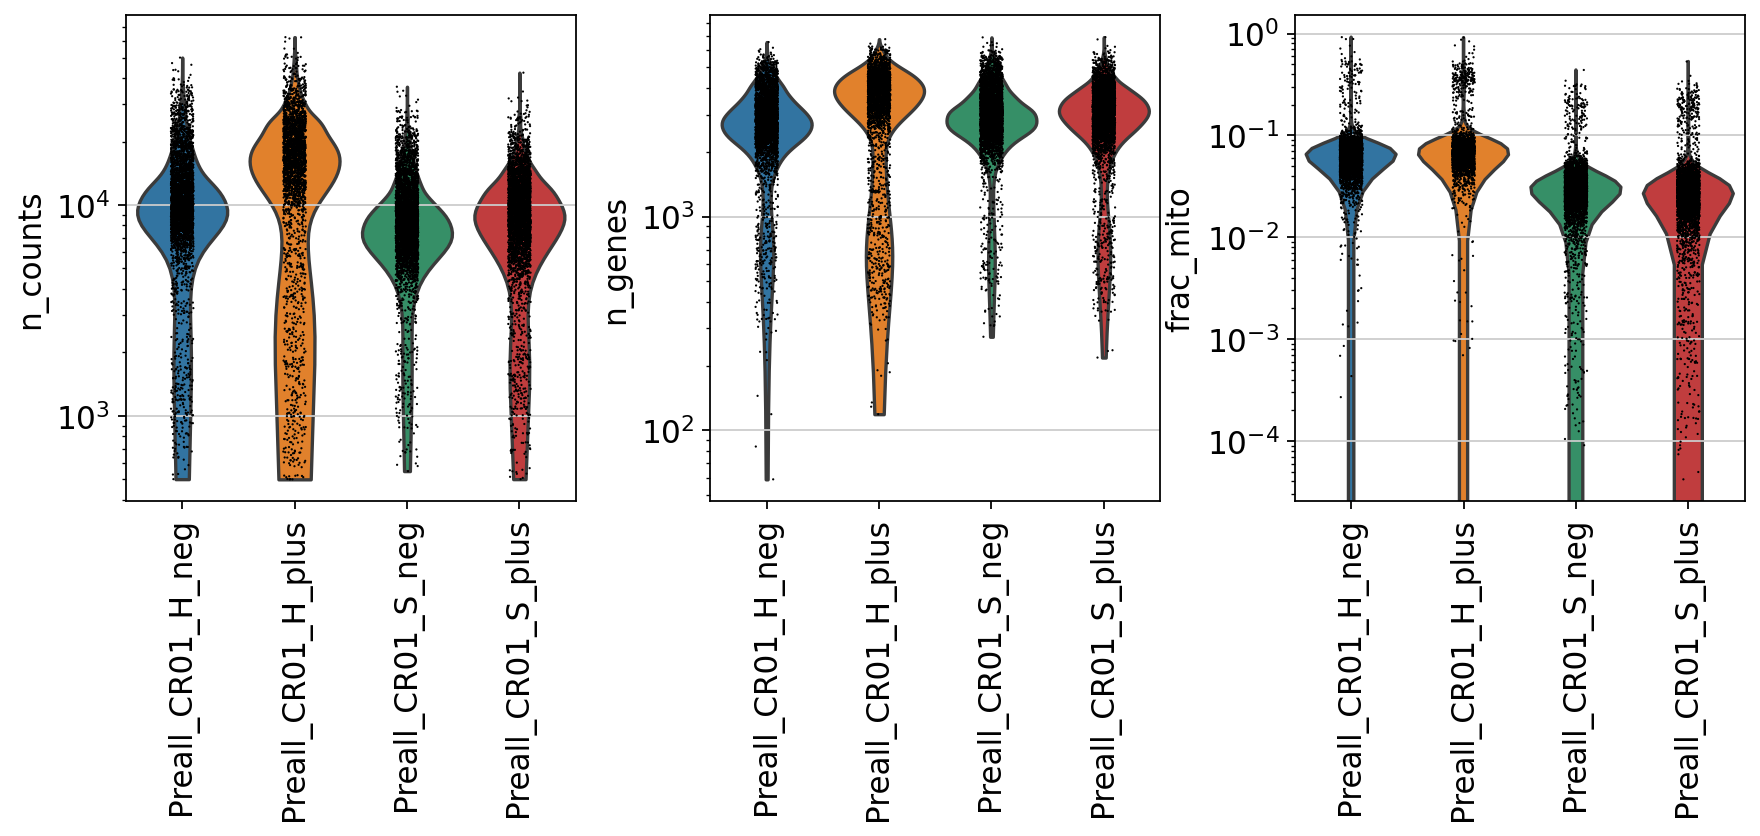

In [86]:
sc.pl.violin(
    adata, 
    groupby='Sample', 
    keys=['n_counts','n_genes', 
    'frac_mito'], 
    log=True,
    rotation=90,
    )


## Quiz!

Try computing the fraction of reads coming from another family of genes... say, ribosomal proteins?  

Hint: they all start with either "RPL" or "RPS"...



## Preprocessing and normalization

By default, Scanpy takes a very simple and straightforward approach to normalizing the gene expression levels across cells in the dataset:   

$$ normCounts = (gene XCounts\:/\: totalCounts)\: x \:10^4$$

This is a big topic, with a lot of opinions about whether you should use much fancier methods:   
https://blog.bioturing.com/2022/01/27/a-guide-to-scrna-seq-normalization/  
https://genomebiology.biomedcentral.com/articles/10.1186/s13059-019-1874-1  
https://www.frontiersin.org/articles/10.3389/fgene.2020.00041/full

In [87]:
def preprocess(adata):
    sc.pp.normalize_total(
        adata, 
        target_sum=1e4, # "reads per 10k" is the norm for single-cell data, for some reason
        exclude_highly_expressed=True, #If any cell is dominated by a given gene, exclude those from computing the normalization factor
        max_fraction = 0.05)
    
    sc.pp.log1p(adata)
    
    # saves the log-normalized counts to a daughter object. 
    # This will be called under the hood by differential expression and plotting tools
    adata.raw = adata.copy()
    
    return adata

preprocess(adata)

normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['FTH1', 'NEAT1', 'MALAT1', 'GAPDH', 'RPS29', 'MT2A', 'PLCG2', 'FTL', 'MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4', 'MT-CYB']
    finished (0:00:00)


AnnData object with n_obs × n_vars = 15152 × 36601
    obs: 'Sample', 'n_counts', 'n_genes', 'log(UMIs)', 'frac_mito'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'Sample_Metadata', 'Sample_colors', 'log1p'
    layers: 'counts'

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:08)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:05)


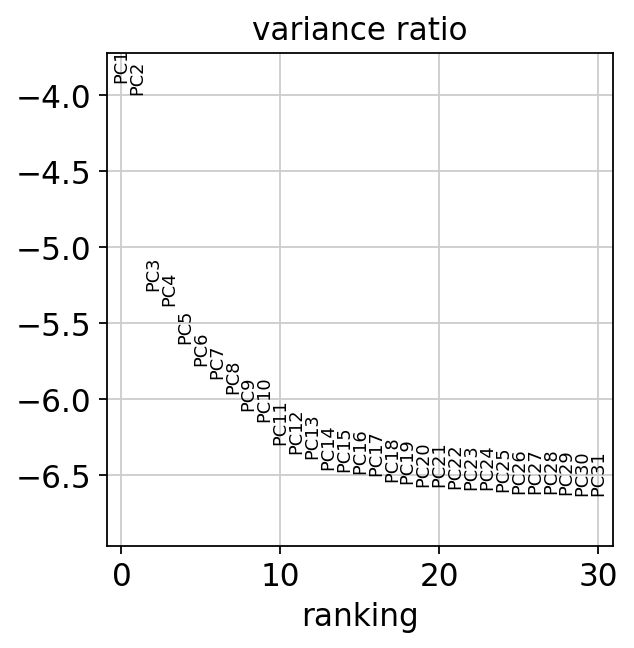

In [88]:
def reduce_dimensions(adata):
    sc.pp.scale(adata, max_value=10)
    sc.pp.highly_variable_genes(adata, n_top_genes=4000)
    sc.pp.pca(adata, use_highly_variable=True)
    sc.pl.pca_variance_ratio(adata, log=True)
    
reduce_dimensions(adata)

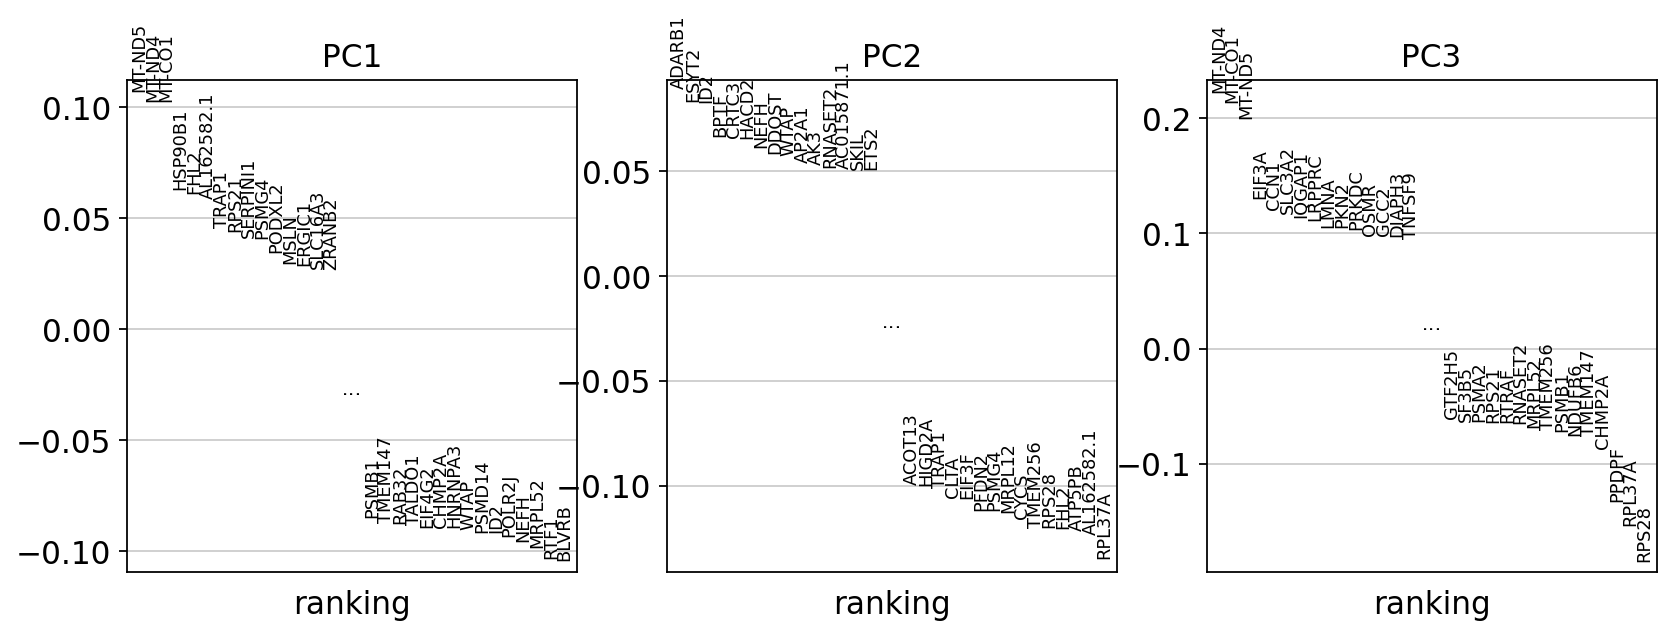

In [89]:
sc.pl.pca_loadings(adata)

## Cluster cells
To identify cell clusters, we must first compute a neighbor graph. The first step of this is to compute all pairwise distances between cells in the dataset.  In the picture below, it is easy to imagine how to compute the distance between two points on the 2D plane.  For us, we are computing the graph in higher dimensions. Using all ~30k genes in the dataset would be crazy.  Instead, we are using the reduced dimension space we just computed via PCA to calculate these distances.  

The neighbor graph algorithm then figures out which cells are connected to which. Usually, the graph is pruned down to only the closest "K" nearest neighbors, hence the common name 'knn' graphs.  Scanpy uses a default of **knn=15**

The clustering algorithm uses a form of <a href="https://timoast.github.io/blog/community-detection/"> community detection via modularity optimization </a>. Basically, it tries to enclose communities of cells in bubbles, checks to see how many close neighbors got assigned to the same vs different bubbles, and then keeps tweaking those bubbles until it can't do any better at grouping like cells together.

<img src='https://miro.medium.com/max/738/1*skhjgApyDIPbJNolIZCF5w.png' width=300 align=left>

In [91]:

sc.pp.neighbors(
    adata,
    n_neighbors = 15, # default=15
    n_pcs = None, # Use all pre-computed PCs by default
    metric = 'euclidean' # there are lots of possible distance metrics.  Try 'cityblock' or 'cosine'
)

# Clustering by Leiden modularity optimization
sc.tl.leiden(
    adata, 
    resolution=0.5, # Try playing with this!
    key_added='Cluster' # This is the key that will appear in adata.obs with the new cluster names
    # You can repeat clustering again and again and give it a new key name each time, if you want
)


computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
running Leiden clustering
    finished: found 5 clusters and added
    'Cluster', the cluster labels (adata.obs, categorical) (0:00:01)


In [92]:
adata.obs

Sample  n_counts  n_genes  \
AAACCCAAGGTGTGAC-1-Preall_CR01_H_plus  Preall_CR01_H_plus     20865     4195   
AAACCCAAGTGTAGTA-1-Preall_CR01_H_plus  Preall_CR01_H_plus     20875     4176   
AAACCCATCCGGACTG-1-Preall_CR01_H_plus  Preall_CR01_H_plus     41960     6042   
AAACGAACAATGAAAC-1-Preall_CR01_H_plus  Preall_CR01_H_plus     25528     4211   
AAACGAATCGAGAATA-1-Preall_CR01_H_plus  Preall_CR01_H_plus     19570     3667   
...                                                   ...       ...      ...   
TTTGGTTGTGGCCCAT-1-Preall_CR01_S_neg    Preall_CR01_S_neg     21273     5510   
TTTGTTGAGGAGAGGC-1-Preall_CR01_S_neg    Preall_CR01_S_neg      5728     2313   
TTTGTTGCAAAGCAAT-1-Preall_CR01_S_neg    Preall_CR01_S_neg     13705     4088   
TTTGTTGTCAAGCGTT-1-Preall_CR01_S_neg    Preall_CR01_S_neg     11473     3581   
TTTGTTGTCTCTGCCA-1-Preall_CR01_S_neg    Preall_CR01_S_neg     12721     3996   

                                       log(UMIs)  frac_mito Cluster  
AAACCCAAGGTGTGAC-1-Preall_CR01_H_plus   4.319418   0.082818       1  
AAACCCAAGTGTAGTA-1-Preall_CR01_H_plus   4.319626   0.042874       1  
AAACCCATCCGGACTG-1-Preall_CR01_H_plus   4.622835   0.087512       1  
AAACGAACAATGAAAC-1-Preall_CR01_H_plus   4.407017   0.040896       1  
AAACGAATCGAGAATA-1-Preall_CR01_H_plus   4.291591   0.078232       3  
...                                          ...        ...     ...  
TTTGGTTGTGGCCCAT-1-Preall_CR01_S_neg    4.327829   0.010013       0  
TTTGTTGAGGAGAGGC-1-Preall_CR01_S_neg    3.758003   0.025489       0  
TTTGTTGCAAAGCAAT-1-Preall_CR01_S_neg    4.136879   0.041591       0  
TTTGTTGTCAAGCGTT-1-Preall_CR01_S_neg    4.059677   0.030071       0  
TTTGTTGTCTCTGCCA-1-Preall_CR01_S_neg    4.104521   0.031759       0  

[15152 rows x 6 columns]

## Nonlinear Dimensionality Reduction

PCA helped reduce our dimensionality from ~30,000 down to ~50, but unfortunately our computer screens only easily display 2 dimensions.  
**tSNE** and **UMAP** are two commonly used to bring the number of dimensions down to 2 for visualization purposes. Keep in mind that the non-linearity of these methods means they are generally not very useful analytical tools.  Again, they are for *visualization*.  

**Which to use?**
UMAP has become more standard because it tends to better preserve global relationship between cell types. That is, very different cell types stay far away from one another, while similar cells are kind of packed in amorphously.  tSNE prioritizes local structure, emphasizing 'sub-cluster-level' details. But scRNA-seq data is so noisy, that focusing on these minute details is probably a waste of time.

<a href='https://pair-code.github.io/understanding-umap/'> Here is a super fun interactive explanation of the differences between UMAP and tSNE </a>


In [93]:
# Compute tSNE projection
sc.tl.tsne(adata, n_pcs=20)

# Compute UMAP projection
# Note the inconsistency in "n_pcs" vs "n_components".  Confusing. Tsk, Tsk. 
# calling it "n_components" is more future-proof if people move away from PCA
sc.tl.umap(adata, n_components=20)

computing tSNE
    using 'X_pca' with n_pcs = 20
    using sklearn.manifold.TSNE


/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:56)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:23)


Sheesh, tSNE is slow.

In [96]:
adata

AnnData object with n_obs × n_vars = 15152 × 36601
    obs: 'Sample', 'n_counts', 'n_genes', 'log(UMIs)', 'frac_mito', 'Cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'mean', 'std', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Sample_Metadata', 'Sample_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'tsne', 'umap', 'Cluster_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [97]:
adata.obsm['X_tsne']

array([[ 9.3246908e+00,  6.1178532e+01],
       [ 2.4800846e+01,  3.0208326e+01],
       [ 8.9190292e+00,  8.3655136e+01],
       ...,
       [-2.5750727e+01, -3.6850018e+01],
       [ 5.2386142e-02, -7.8369949e+01],
       [-1.6693607e+01, -5.3408928e+01]], dtype=float32)

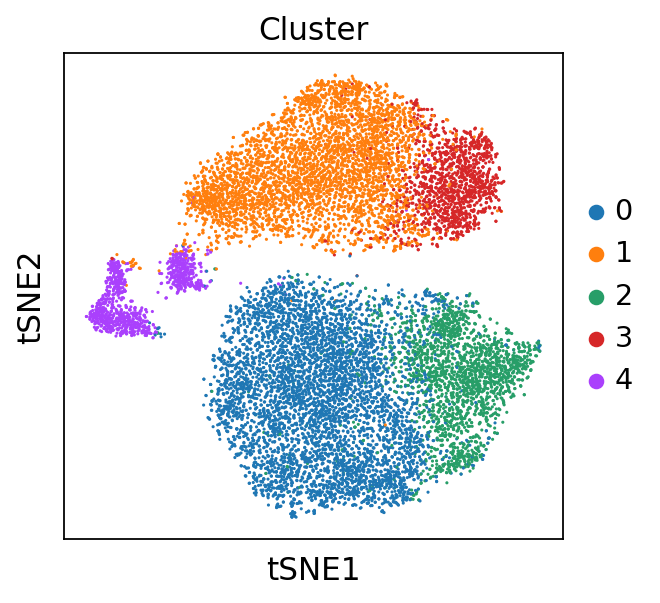

In [94]:
sc.pl.tsne(adata, color='Cluster')

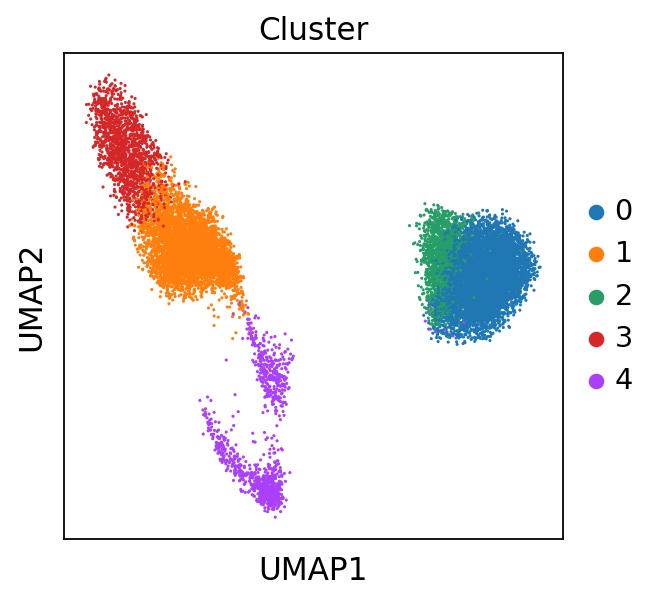

In [95]:
sc.pl.umap(adata, color='Cluster')

## Filter cells

Some of these cells probably should have never made the final cut.  Let's visualize all the cells with fewer than 1,000 UMIs:


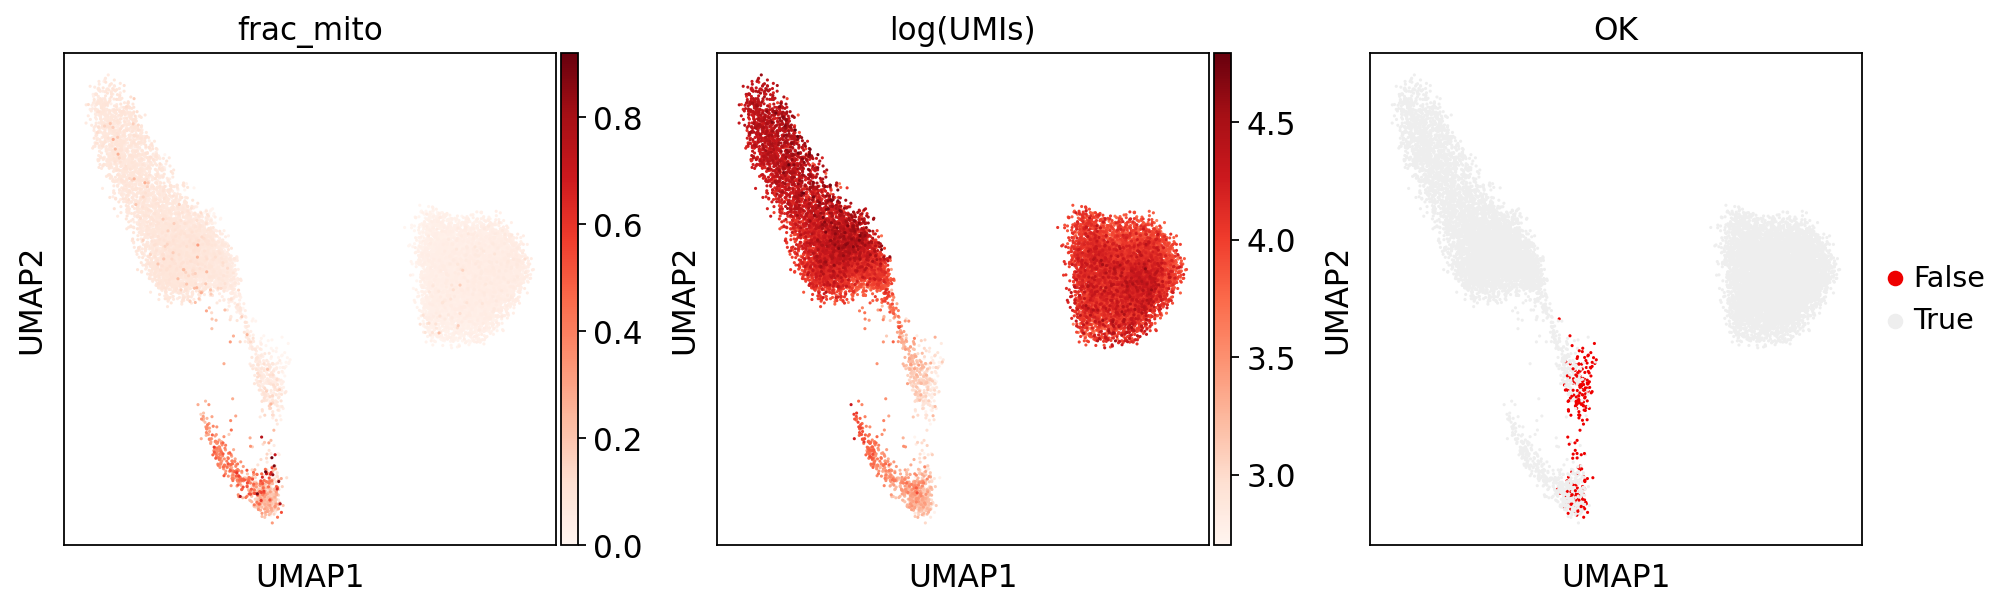

In [99]:
# Make a quick pass/fail filter to visualize cells with low-ish UMI counts
adata.obs['OK']  = (adata.obs['n_counts'] > 1000).astype('category')

# Note that you can specify the palette of a categorical or string variable using the .uns data object
# For each such key in .obs, there is a corresponding "{KEY}_colors" entry in .uns
# The order of the colors will map to the SORTED order of unique category names.
adata.uns['OK_colors'] = ['#EE0000','#EEEEEE'] # Red and light grey palette


sc.pl.umap(adata, color=['frac_mito', 'log(UMIs)','OK'])

In [100]:
# bin & count using Pandas' fantastic pd.crosstab method:
pd.crosstab(
    index=adata.obs['Cluster'], 
    columns=adata.obs['OK'],
    )

OK       False  True
Cluster             
0            0  5865
1            0  4479
2            0  2322
3            0  1476
4          230   780

Entropy is another way to represent how complex a cell's transcriptome is.  Dying cells can sometime retain a large amount of mitochondrial RNA, giving it a higher UMI count, but it is all a handful of artifactual genes, then who cares?

In [101]:
def entropy(array, r=1e-9):
    if isinstance(array, list):
        array = np.array(array)
    array = array + r
    total_counts = array.sum()
    pA = array / total_counts
    SE = -np.sum(pA*np.log2(pA))
    return SE

X = adata.layers['counts'].toarray()
axis = 1 # apply to axis: 0=genes, 1=cells
adata.obs['Entropy'] =np.apply_along_axis(entropy, axis, X)



<Axes:title={'center':'frac mito'}, xlabel='log(UMIs)', ylabel='Entropy'>

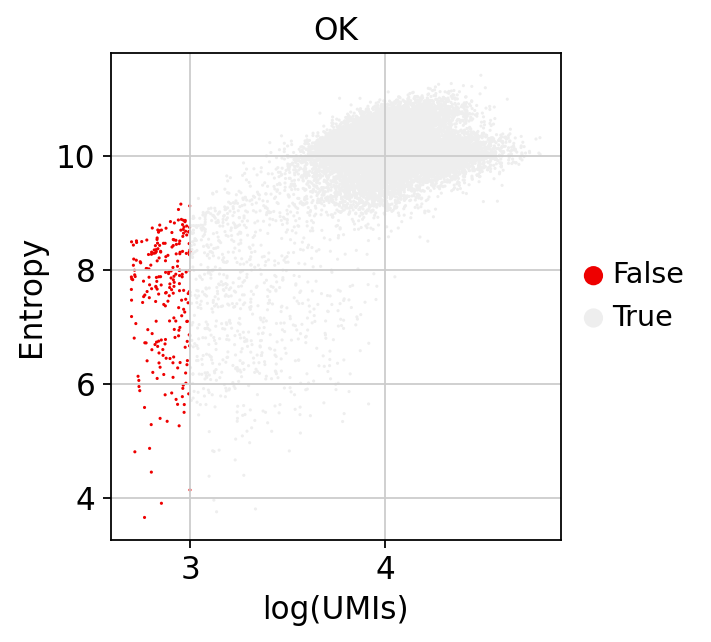

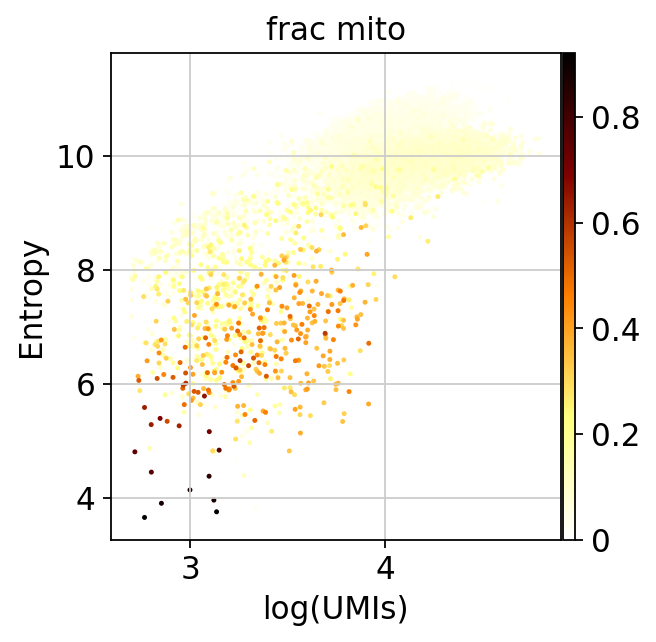

In [102]:
sc.pl.scatter(adata, x='log(UMIs)', y='Entropy', color='OK', show=False)
sc.pl.scatter(adata, x='log(UMIs)', y='Entropy', color='frac_mito', size=20,color_map='afmhot_r', show=False)


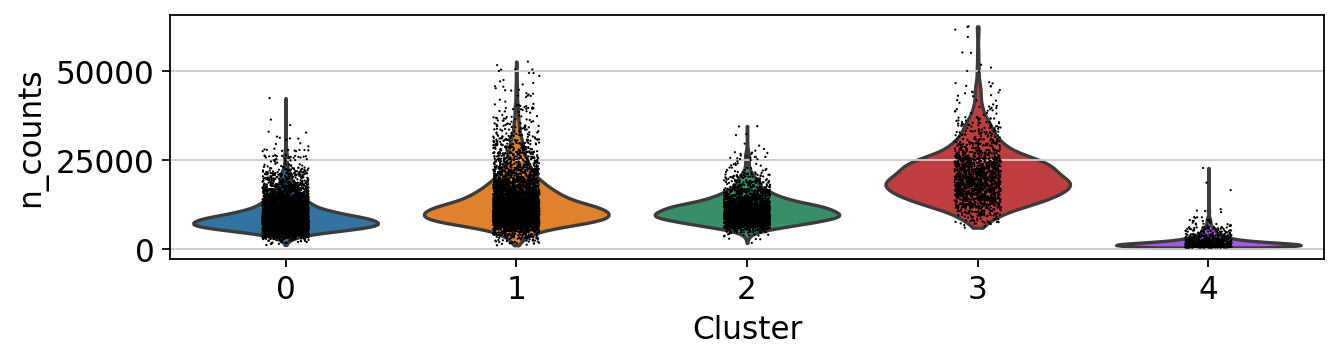

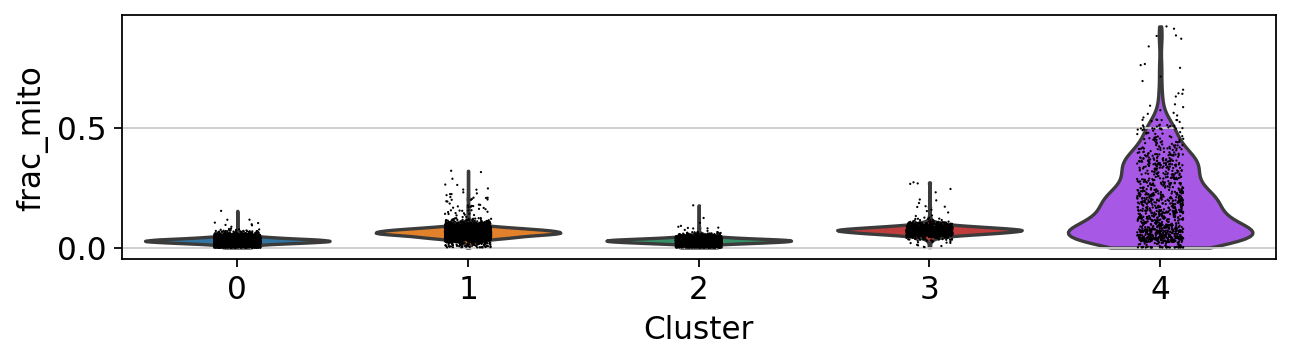

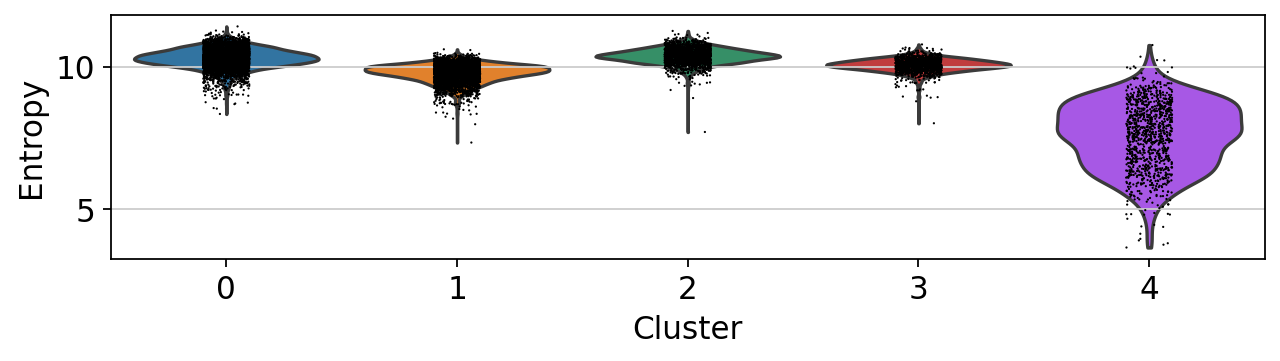

In [103]:
pl.rcParams['figure.figsize'] = [8,2]
sc.pl.violin(adata, groupby='Cluster', keys='n_counts')
sc.pl.violin(adata, groupby='Cluster', keys='frac_mito')
sc.pl.violin(adata, groupby='Cluster', keys='Entropy')

pl.rcParams['figure.figsize'] = [4,4]

Sometimes the best method to filter cells is to use "guilt by association". Rather than drawing a hard cutoff based on one criterion, instead throw away entire cluster(s) filled with suspicious-looking cells. 

In [104]:
bdata = adata[adata.obs['Cluster'] != '4'].copy()

# alternatively, to discard more than one cluster:
# bdata = adata[adata.obs['Cluster'].isin(['0','8']).copy()

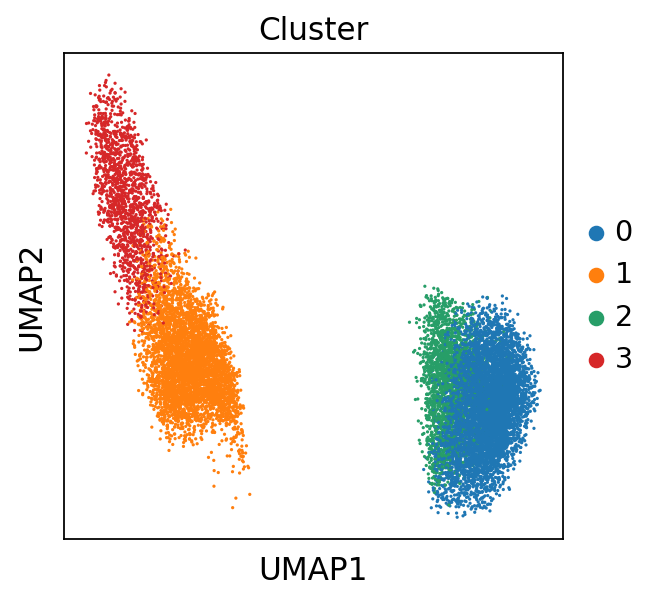

In [106]:
sc.pl.umap(bdata, color='Cluster')

## Re-run the analysis on the filtered set

Combine all these steps into one quick function in case you want to do it over again quickly:

In [107]:
def redo_pca_cluster(
    adata: sc.AnnData,
    key_added: str = 'Subset_Cluster', 
    n_pcs: int = 50, 
    min_cells: int = 1, 
    cluster_resolution: float = 0.5, 
    n_top_genes: int = 4000, 
    exclude_highly_expressed: bool = True, 
    use_highly_variable: bool = True, 
    hvg_batch_key=None,
    scale: bool = True, 
    max_scale_value: int = 10, 
    n_neighbors: int=15,
    use_local: bool = False, 
    random_state: int = 0,
    ):
    
    print("Reclustering...")
    print("Using arguments:")
    print("n_pcs = ",n_pcs)
    #print("min_genes = ",min_genes)
    #print("min_counts = ",min_counts)
    print("min_cells = ",min_cells)
    print("cluster_resolution = ",cluster_resolution)
    print("n_top_genes = ",n_top_genes)
    print("use_highly_variable = ",use_highly_variable)
    
    print('Restoring raw counts from adata.layers[\'counts\']')
    adata.X = adata.layers['counts']

    sc.pp.normalize_total(
        adata, 
        target_sum=1e4, 
        exclude_highly_expressed=exclude_highly_expressed, 
        key_added='Norm_Factor')

    print ('Log transforming...')
    sc.pp.log1p(adata)
    print ('Saving normalized log-transformed data to .raw')
    adata.raw = adata.copy()
    print('Done.')
    
    if use_highly_variable:
        print("Computing Highly Variable Genes with n_top_genes = {}...".format(n_top_genes))
        sc.pp.highly_variable_genes(
            adata, 
            n_top_genes=n_top_genes, 
            batch_key=hvg_batch_key)

    else:
        if scale==True:
            print()
            print("Scaling .X layer to Z-scores with a max value of {}".format(max_scale_value))
            sc.pp.scale(adata, max_value=max_scale_value)

    print("PCA...")
    sc.pp.pca(adata, use_highly_variable=use_highly_variable, random_state=random_state)
    
    print("Computing KNN graph with n_pcs = {}...".format(n_pcs))
    sc.pp.neighbors(
        adata,
        n_pcs=n_pcs,
        n_neighbors=n_neighbors,
        random_state=random_state)

    #print("Computing UMAP...")
    sc.tl.umap(adata, random_state=random_state)
    
    print("Clustering by Leiden Modularity Optimization, cluster_resolution = {}...new clusters will be named: {}".format(cluster_resolution,key_added))
    sc.tl.leiden(adata,resolution=cluster_resolution, key_added=key_added, random_state=random_state)
    
    sc.pl.umap(adata, color=key_added)

Reclustering...
Using arguments:
n_pcs =  50
min_cells =  1
cluster_resolution =  0.5
n_top_genes =  4000
use_highly_variable =  True
Restoring raw counts from adata.layers['counts']
normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['FTH1', 'MALAT1', 'GAPDH', 'RPS29', 'MT2A', 'FTL', 'MT-CO2', 'MT-CO3']
    finished (0:00:00)
Log transforming...
Saving normalized log-transformed data to .raw
Done.
Computing Highly Variable Genes with n_top_genes = 4000...
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
PCA...
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:03)
Computing KNN graph with n_pcs = 50...
computing neighbors
    using 'X_p

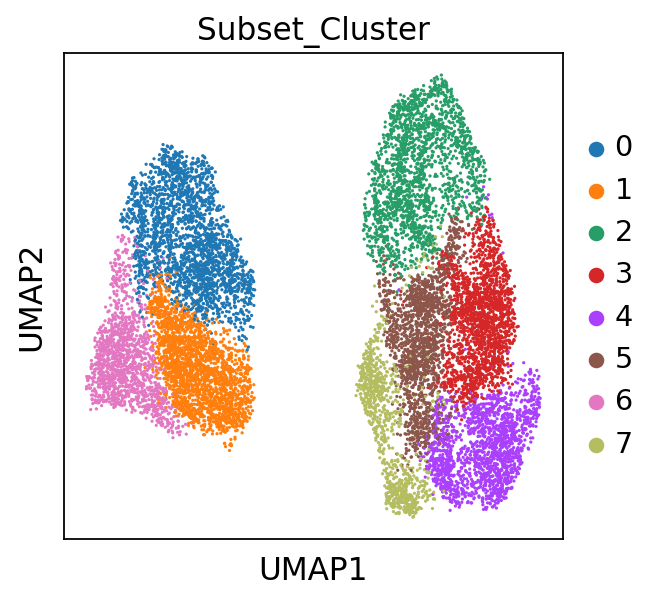

In [108]:
redo_pca_cluster(bdata)

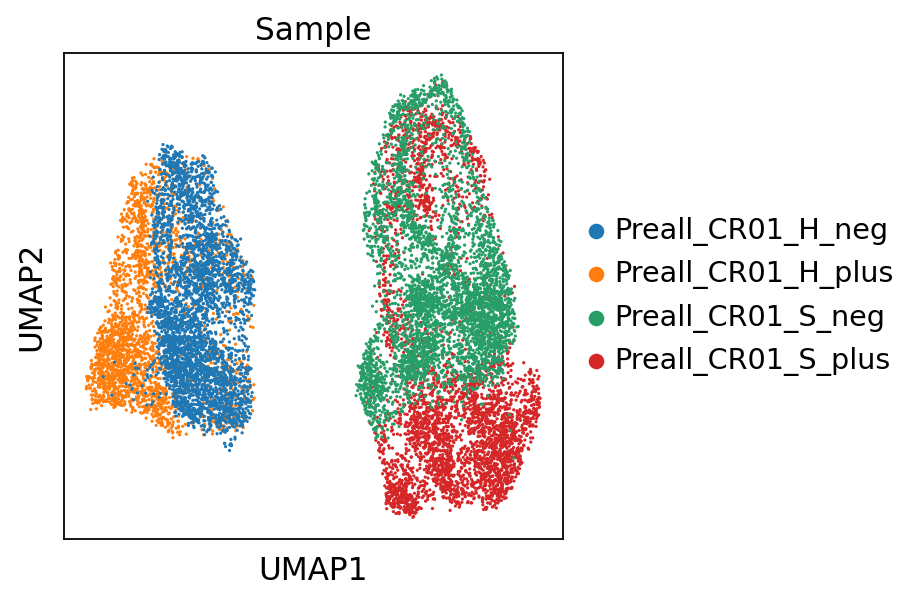

In [109]:
sc.pl.umap(bdata, color='Sample')

In [114]:
bdata.obs['Cell_Type'] = bdata.obs['Sample'].str.split('_').str[2]
bdata.obs['Treatment'] = bdata.obs['Sample'].str.split('_').str[3]

bdata.obs

Sample  n_counts  n_genes  \
AAACCCAAGGTGTGAC-1-Preall_CR01_H_plus  Preall_CR01_H_plus     20865     4195   
AAACCCAAGTGTAGTA-1-Preall_CR01_H_plus  Preall_CR01_H_plus     20875     4176   
AAACCCATCCGGACTG-1-Preall_CR01_H_plus  Preall_CR01_H_plus     41960     6042   
AAACGAACAATGAAAC-1-Preall_CR01_H_plus  Preall_CR01_H_plus     25528     4211   
AAACGAATCGAGAATA-1-Preall_CR01_H_plus  Preall_CR01_H_plus     19570     3667   
...                                                   ...       ...      ...   
TTTGGTTGTGGCCCAT-1-Preall_CR01_S_neg    Preall_CR01_S_neg     21273     5510   
TTTGTTGAGGAGAGGC-1-Preall_CR01_S_neg    Preall_CR01_S_neg      5728     2313   
TTTGTTGCAAAGCAAT-1-Preall_CR01_S_neg    Preall_CR01_S_neg     13705     4088   
TTTGTTGTCAAGCGTT-1-Preall_CR01_S_neg    Preall_CR01_S_neg     11473     3581   
TTTGTTGTCTCTGCCA-1-Preall_CR01_S_neg    Preall_CR01_S_neg     12721     3996   

                                       log(UMIs)  frac_mito Cluster    OK  \
AAACCCAAGGTGTGAC-1-Preall_CR01_H_plus   4.319418   0.082818       1  True   
AAACCCAAGTGTAGTA-1-Preall_CR01_H_plus   4.319626   0.042874       1  True   
AAACCCATCCGGACTG-1-Preall_CR01_H_plus   4.622835   0.087512       1  True   
AAACGAACAATGAAAC-1-Preall_CR01_H_plus   4.407017   0.040896       1  True   
AAACGAATCGAGAATA-1-Preall_CR01_H_plus   4.291591   0.078232       3  True   
...                                          ...        ...     ...   ...   
TTTGGTTGTGGCCCAT-1-Preall_CR01_S_neg    4.327829   0.010013       0  True   
TTTGTTGAGGAGAGGC-1-Preall_CR01_S_neg    3.758003   0.025489       0  True   
TTTGTTGCAAAGCAAT-1-Preall_CR01_S_neg    4.136879   0.041591       0  True   
TTTGTTGTCAAGCGTT-1-Preall_CR01_S_neg    4.059677   0.030071       0  True   
TTTGTTGTCTCTGCCA-1-Preall_CR01_S_neg    4.104521   0.031759       0  True   

                                         Entropy  Norm_Factor Subset_Cluster  \
AAACCCAAGGTGTGAC-1-Preall_CR01_H_plus   9.879247        18621              1   
AAACCCAAGTGTAGTA-1-Preall_CR01_H_plus   9.995719        19259              0   
AAACCCATCCGGACTG-1-Preall_CR01_H_plus  10.293697        38224              0   
AAACGAACAATGAAAC-1-Preall_CR01_H_plus   9.576294        23125              0   
AAACGAATCGAGAATA-1-Preall_CR01_H_plus   9.746535        18275              6   
...                                          ...          ...            ...   
TTTGGTTGTGGCCCAT-1-Preall_CR01_S_neg   11.131761        19960              2   
TTTGTTGAGGAGAGGC-1-Preall_CR01_S_neg   10.177334         5408              3   
TTTGTTGCAAAGCAAT-1-Preall_CR01_S_neg   10.399048        12284              5   
TTTGTTGTCAAGCGTT-1-Preall_CR01_S_neg   10.491768        10562              2   
TTTGTTGTCTCTGCCA-1-Preall_CR01_S_neg   10.470846        11318              5   

                                      Cell_Type Treatment  
AAACCCAAGGTGTGAC-1-Preall_CR01_H_plus         H      plus  
AAACCCAAGTGTAGTA-1-Preall_CR01_H_plus         H      plus  
AAACCCATCCGGACTG-1-Preall_CR01_H_plus         H      plus  
AAACGAACAATGAAAC-1-Preall_CR01_H_plus         H      plus  
AAACGAATCGAGAATA-1-Preall_CR01_H_plus         H      plus  
...                                         ...       ...  
TTTGGTTGTGGCCCAT-1-Preall_CR01_S_neg          S       neg  
TTTGTTGAGGAGAGGC-1-Preall_CR01_S_neg          S       neg  
TTTGTTGCAAAGCAAT-1-Preall_CR01_S_neg          S       neg  
TTTGTTGTCAAGCGTT-1-Preall_CR01_S_neg          S       neg  
TTTGTTGTCTCTGCCA-1-Preall_CR01_S_neg          S       neg  

[14142 rows x 12 columns]

## Batch correction with Harmony

<img src="https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fs41592-019-0619-0/MediaObjects/41592_2019_619_Fig1_HTML.png?as=webp" align=left>  



<a href="https://www.nature.com/articles/s41592-019-0619-0"> Harmony paper by Korsunsky et al </a>

In [119]:
def harmony(adata, 
    batch_key='Sample', 
    theta: float = 4, #harmony docs use 2.0 as default 
    max_iter_harmony=15, 
    random_state=42,
    ridge_lambda: float = 1.0,
    sigma: float = 0.1,
    tau: int = 0,
    block_proportion: float = 0.05,
    n_clusters_harmony: int = None,
    use_gpu=False, 
    cluster_and_umap=True, 
    key_added='Cluster_harmony', 
    n_pcs=None,
    prune_graph=False):
    #requires pip install harmony-pytorch
    from harmony import harmonize
    
    if n_pcs:
        X = adata.obsm['X_pca'][:,:n_pcs]
    else: 
        X = adata.obsm['X_pca']
    print('Computing harmonized PCA using {} PCs...'.format(X.shape[1]))
    Z = harmonize(
        X,
        adata.obs,
        batch_key = batch_key,
        max_iter_harmony=max_iter_harmony,
        random_state=random_state,
        use_gpu=use_gpu,
        theta=theta,
        ridge_lambda=ridge_lambda,
        sigma=sigma,
        tau=tau,
        n_clusters=n_clusters_harmony,
        block_proportion = block_proportion,
    )
    adata.obsm['X_harmony'] = Z
    print('Storing harmonized PCA in adata.obsm[\'X_harmony\']')
    
    if cluster_and_umap:
        sc.pp.neighbors(adata, use_rep='X_harmony', random_state=random_state)
        sc.tl.umap(adata, random_state=random_state)
        sc.tl.leiden(adata, resolution=0.5, key_added=key_added, random_state=random_state)
        sc.pl.umap(adata, color=key_added)
        
    return adata

Computing harmonized PCA using 50 PCs...
	Initialization is completed.
	Completed 1 / 15 iteration(s).
	Completed 2 / 15 iteration(s).
Reach convergence after 2 iteration(s).
Storing harmonized PCA in adata.obsm['X_harmony']
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)
running Leiden clustering
    finished: found 8 clusters and added
    'Cluster_harmony', the cluster labels (adata.obs, categorical) (0:00:01)


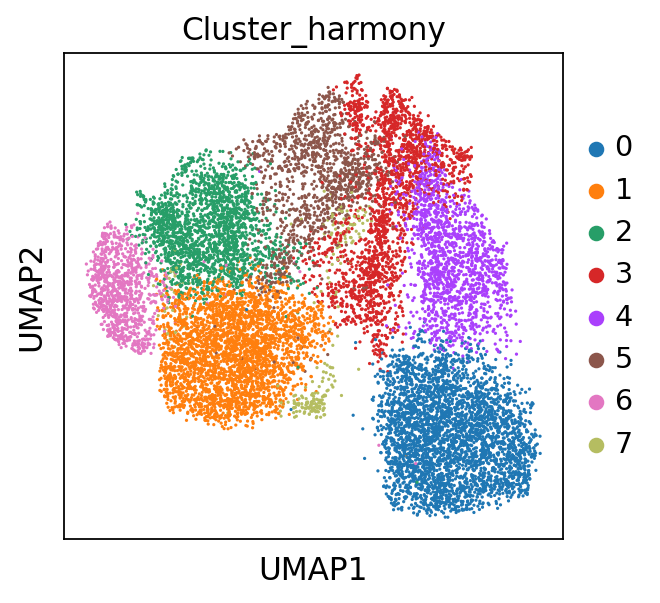

In [120]:
bdata = harmony(bdata, batch_key='Sample')

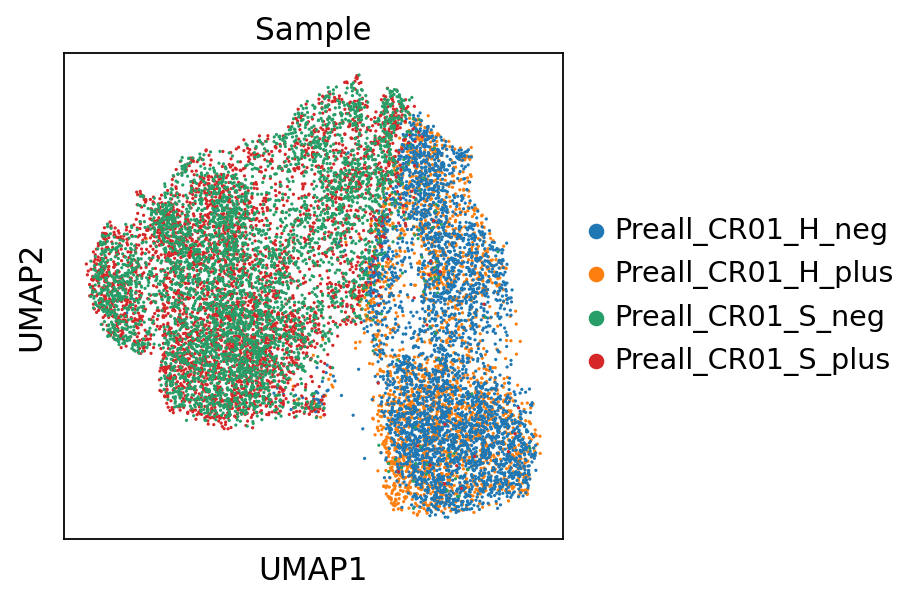

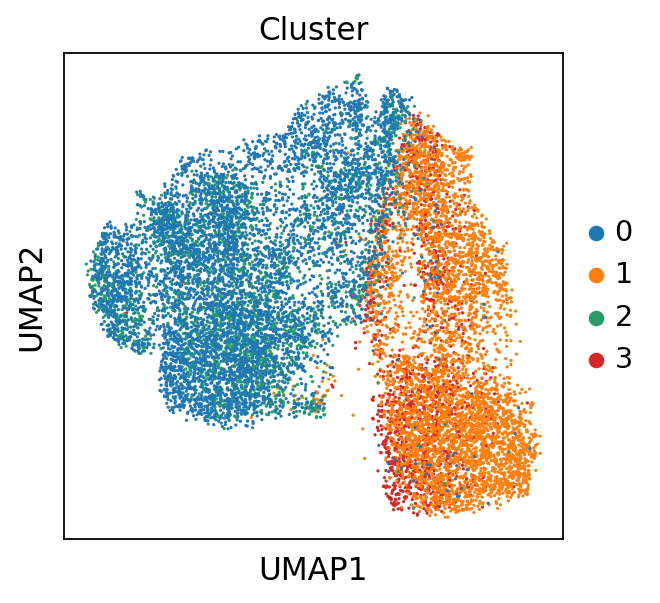

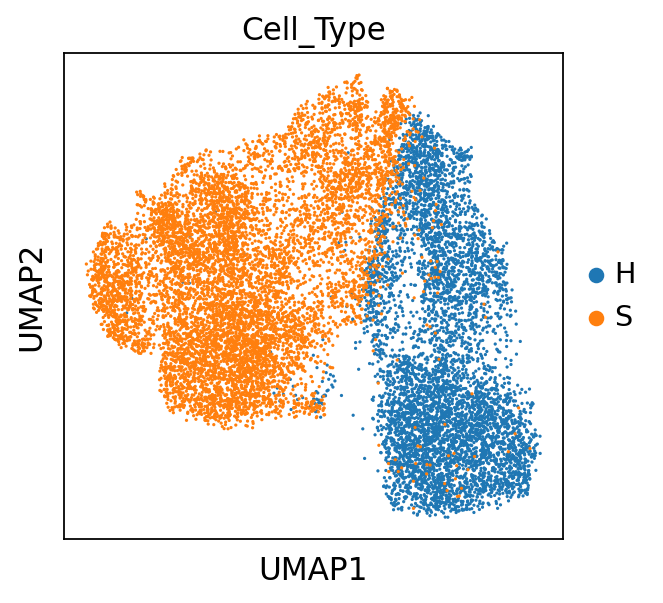

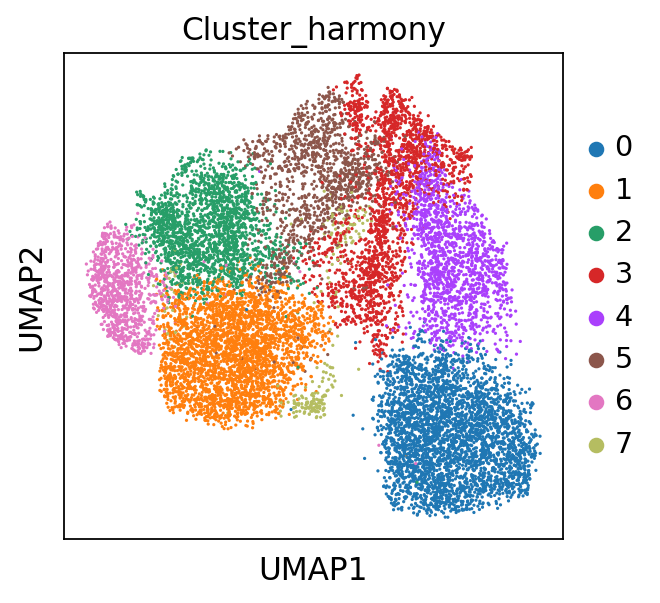

In [122]:
sc.pl.umap(bdata, color='Sample')
sc.pl.umap(bdata, color='Cluster')
sc.pl.umap(bdata, color='Cell_Type')
sc.pl.umap(bdata, color='Cluster_harmony')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_Cluster_harmony']`


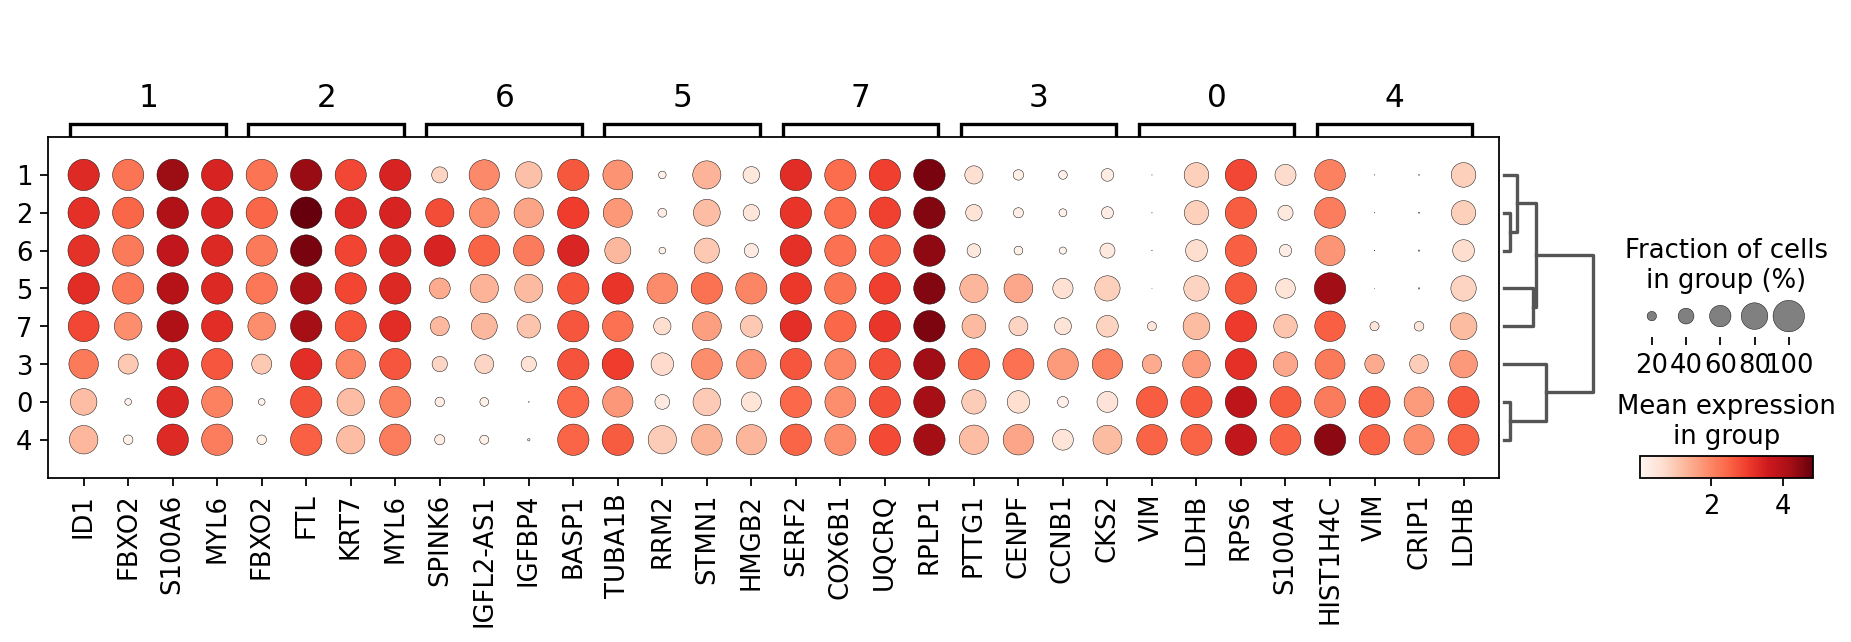

In [123]:
sc.tl.rank_genes_groups(bdata, groupby='Cluster_harmony')
sc.pl.rank_genes_groups_dotplot(bdata, n_genes=4)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)
categories: 0, 1, 2, etc.
var_group_labels: 2, 0


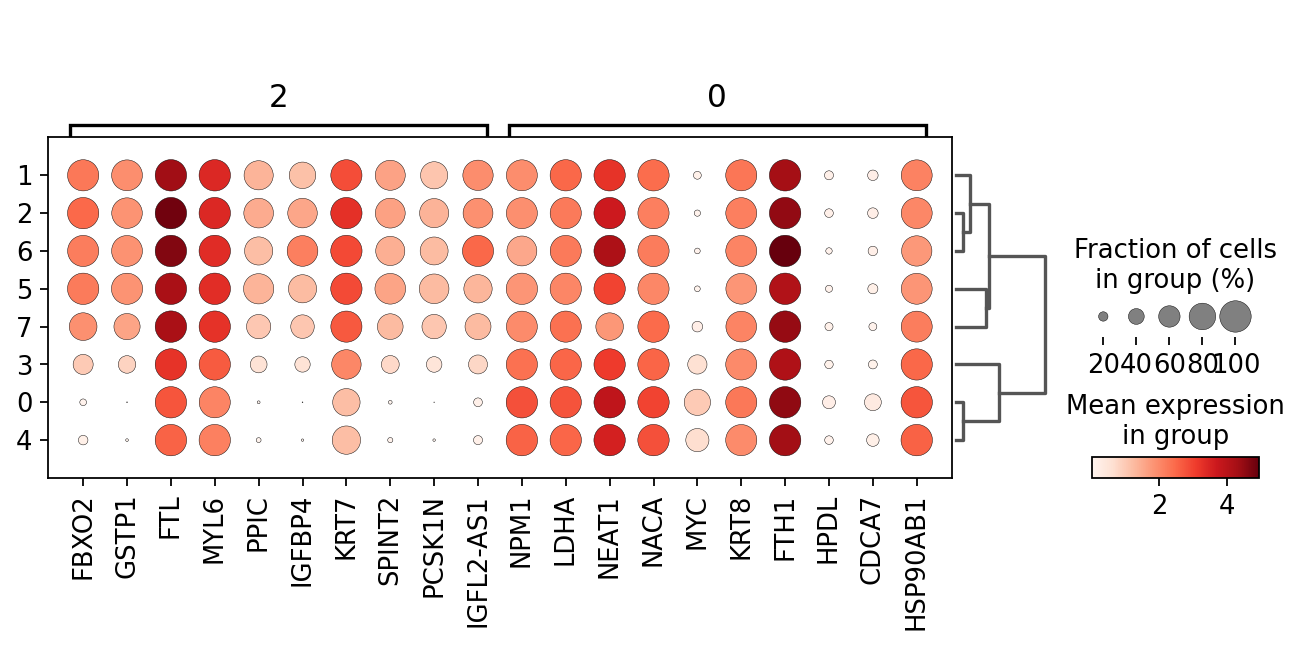

In [127]:
sc.tl.rank_genes_groups(bdata, groupby='Cluster_harmony', groups=['2','0'], reference='4')

sc.pl.rank_genes_groups_dotplot(bdata, n_genes=10)

In [129]:
sc.get.rank_genes_groups_df(bdata, group='0')

names      scores  logfoldchanges         pvals     pvals_adj
0          NPM1   20.642908        0.404240  6.865500e-89  2.792046e-86
1          LDHA   18.369081        0.391811  9.481322e-72  3.017616e-69
2         NEAT1   18.032890        0.484036  5.321441e-69  1.650594e-66
3          NACA   17.156797        0.269832  7.963300e-63  2.208066e-60
4           MYC   16.572206        0.851722  2.722346e-59  7.066709e-57
...         ...         ...             ...           ...           ...
36596    TUBA1B  -51.081291       -1.434949  0.000000e+00  0.000000e+00
36597       PBK  -51.252804       -2.146518  0.000000e+00  0.000000e+00
36598     UBE2C  -54.029449       -3.168555  0.000000e+00  0.000000e+00
36599     TOP2A  -64.385727       -3.206663  0.000000e+00  0.000000e+00
36600  HIST1H4C -119.376892       -3.505958  0.000000e+00  0.000000e+00

[36601 rows x 5 columns]

# Write the processed data to a file

In [73]:
# The .X data layer is largely useless at this point, and takes up a lot of space
# It was used to generate the current clusters, but isn't used for diff.expression
# Before writing the file, get rid of it by filling it with a sparse matrix of zeros

cdata = bdata.copy()

from scipy import sparse

outfile = 'FTPS22_processed.h5ad'
cdata.X = sparse.csr_matrix(np.zeros(cdata.X.shape))
cdata.write(outfile, compression='gzip')
print(f'Wrote file: {outfile}, size: {os.path.getsize(outfile) / 2**20} MB')

del cdata

Wrote file: FTPS22_processed.h5ad, size: 125.17902278900146 MB


# Other exercises:

## Filtered vs Raw matrices

Cellranger outputs two data matrices. One 'raw' matrix, that contains gene expression counts for ALL possible barcodes, and one that has been filtered for the droplets that most liekly contained intact cells. Typically, people only bother starting with the filtered matrix, but there can be value in looking at the raw matrix.

For one, a sloppy cell filtering algorithm could systematically miss certain cell types with low mRNA counts, as was the case with early Cellranger (2.x) software. It would just completely gloss over T- and B- cells, or other transcriptionally "quiet" cells. 

You can also look at to gauge the amount of "ambient" RNA floating around in empty droplets.  Let's look at that here:

In [147]:
# See? Each data folder has a filtered and raw data matrix
glob.glob('data/Cell_Culture/*/outs/raw*h5')

['data/Cell_Culture/Preall_CR01_S_neg/outs/raw_feature_bc_matrix.h5',
 'data/Cell_Culture/Preall_CR01_H_plus/outs/raw_feature_bc_matrix.h5',
 'data/Cell_Culture/Preall_CR01_S_plus/outs/raw_feature_bc_matrix.h5',
 'data/Cell_Culture/Preall_CR01_H_neg/outs/raw_feature_bc_matrix.h5']

**Where does that knee plot come from?**

That handy Cellranger knee plot lets you know where the cell calling algorithm drew its cutoffs to select the filtered cells.  It's simple enough to recreate, so for a quick exercise let's do that using Matplotlib.

reading data/Cell_Culture/Preall_CR01_S_neg/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading data/Cell_Culture/Preall_CR01_S_neg/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:01)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


879398 cells x 36601 genes
4500 cells x 36601 genes


/var/folders/nf/xtw56kd973bg5k4ptxf1480w0000gp/T/ipykernel_83273/4272908809.py:32: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(list(range(len(df))))
/var/folders/nf/xtw56kd973bg5k4ptxf1480w0000gp/T/ipykernel_83273/4272908809.py:32: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(list(range(len(df))))


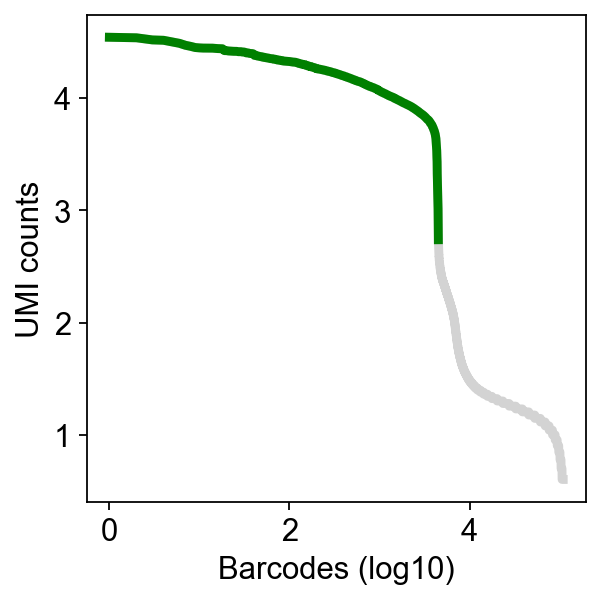

In [149]:
# Read in the filtered data from the Control sample
SAMPLE = 'Preall_CR01_S_neg'
filt = sc.read_10x_h5(f'data/Cell_Culture/{SAMPLE}/outs/filtered_feature_bc_matrix.h5')
filt.var_names_make_unique()

# Now read in the raw data
raw = sc.read_10x_h5(f'data/Cell_Culture/{SAMPLE}/outs/raw_feature_bc_matrix.h5')
raw.var_names_make_unique()

# There are way too many barcodes in the raw data, most of which have only 1 or two counts
# Most of these are random sequencing noise.  So let's drop them out before visualizing

for n, data in enumerate([raw, filt]):
    colors = ['LightGrey','Green']
    
    print(f'{data.shape[0]} cells x {data.shape[1]} genes')
    
    # Calculate the number of UMIs per cell using Numpy
    data.obs['n_counts'] = np.sum(data.X, axis=1).A1.astype('int')
    
    #Calculate the number of unique genes per cell
    data.obs['n_genes'] = np.sum(data.X > 0, axis=1).A1.astype('int')
    
    # Filter out any barcodes with fewer than 4 UMIs
    data = data[data.obs['n_counts'] > 3]
    
    # Make a dataframe with UMI and gene counts, and sort them ascending
    df = data.obs.loc[:,['n_genes','n_counts']].sort_values(by='n_counts', ascending=False)
    
    # plot log(UMI counts) on y and log(rank order) on x
    y = np.log10(df['n_counts'])
    x = np.log10(list(range(len(df))))
    
    pl.plot(x,y, color=colors[n], linewidth=4)

pl.xlabel('Barcodes (log10)')
pl.ylabel('UMI counts')
pl.grid(None)


### Ambient RNA

When integrating samples, one of the most important sources of batch-related error is ambient RNA, or "soup". The raw data matrix gives you a chance to directly measure the abundance of ambient mRNAs in empty droplets to get an idea whether you might need an aggressive soup-based batch correction.  Let's compare our two samples for their ambient RNA content:

In [150]:
# Use glob to make a list containing both raw h5 files:
raw_h5s = glob.glob('data/Cell_Culture/*/outs/raw*h5')
raw_h5s

['data/Cell_Culture/Preall_CR01_S_neg/outs/raw_feature_bc_matrix.h5',
 'data/Cell_Culture/Preall_CR01_H_plus/outs/raw_feature_bc_matrix.h5',
 'data/Cell_Culture/Preall_CR01_S_plus/outs/raw_feature_bc_matrix.h5',
 'data/Cell_Culture/Preall_CR01_H_neg/outs/raw_feature_bc_matrix.h5']

**Plot the distribution of total UMI counts in ALL barcodes from each sample**

Preall_CR01_S_neg
reading data/Cell_Culture/Preall_CR01_S_neg/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:01)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Preall_CR01_H_plus
reading data/Cell_Culture/Preall_CR01_H_plus/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:01)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Preall_CR01_S_plus
reading data/Cell_Culture/Preall_CR01_S_plus/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:01)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Preall_CR01_H_neg
reading data/Cell_Culture/Preall_CR01_H_neg/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:01)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


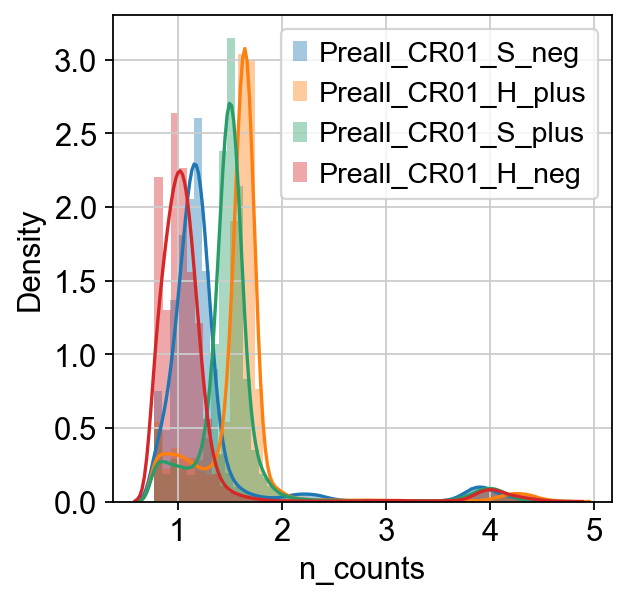

In [151]:
rawdata = {}

for h5 in raw_h5s:
    SAMPLE = h5.split('/')[-3]
    print(SAMPLE)
    
    data = sc.read_10x_h5(h5)
    
    data.obs['n_counts'] = np.sum(data.X, axis=1).A1.astype('int')
    data.obs['n_genes'] = np.sum(data.X > 0, axis=1).A1.astype('int')
    
    data = data[data.obs['n_counts'] > 5]
    
    soup_data = np.log10(data.obs['n_counts'])
    
    # Plot using seaborn distplot, which handily makes a histogram and KDE overlay and plots with matplotlib
    sns.distplot(soup_data, label=SAMPLE)
    
    # Stash this raw data in a dictionary for use in a second
    rawdata[SAMPLE] = data.copy()
    
pl.legend()

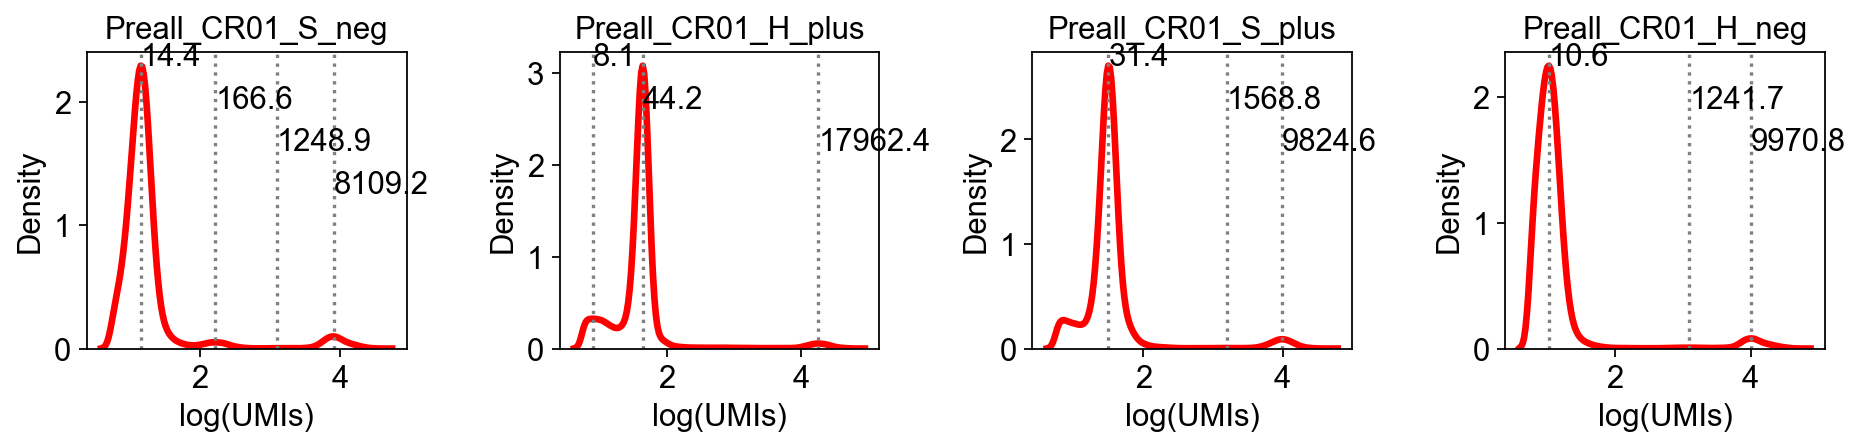

In [157]:
from scipy.signal import find_peaks

fig, ax = pl.subplots(1,4,figsize=[12,3])

for num, sample in enumerate(rawdata.keys()):
    
    data = np.log10(rawdata[sample].obs['n_counts'])
    ax[num] = sns.kdeplot(data, color='Red', linewidth=3, ax=ax[num])

    x = ax[num].lines[0].get_xdata() # Get the x data of the distribution
    y = ax[num].lines[0].get_ydata() # Get the y data of the distribution
    #peaks = scipy.signal.find_peaks(y, width=10)[0]
    peaks = find_peaks(y, width=10)[0]
    peak_logUMIs = x[peaks]
    peaks_delog = np.round(10**peak_logUMIs.astype('float'),1)

    for n,peak in enumerate(peak_logUMIs):
        ax[num].axvline(peak, linestyle=':', color='grey')
        ax[num].text(x=peak, y= y.max() * (1-(0.15*n)), s=peaks_delog[n])
        ax[num].set_title(sample)
    ax[num].grid(None)
    ax[num].set_xlabel('log(UMIs)')
    
pl.tight_layout()

Comments?

### Reading from .mtx format

In [161]:
# Cellranger's output folder in MTX format:

# NOTE: You can't mix Python and Bash, as below:
#SAMPLE='Preall_CR01_S_neg'
#! ls f'data/Cell_Culture/{SAMPLE}/outs/filtered_feature_bc_matrix' 

# if calling Bash commands from Jupyter, use Bash syntax:
! SAMPLE=Preall_CR01_S_neg
! ls data/Cell_Culture/$SAMPLE/outs/filtered_feature_bc_matrix

barcodes.tsv.gz features.tsv.gz matrix.mtx.gz


If these files are coming straight out of Cellranger, Scanpy can read a whole directory in natively:


In [163]:
example = sc.read_10x_mtx('data/Cell_Culture/Preall_CR01_S_neg/outs/filtered_feature_bc_matrix')

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['FTH1', 'NEAT1', 'MALAT1', 'MT2A', 'PLCG2', 'FTL', 'MT-CO1', 'MT-CO2', 'MT-CO3']
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:03)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:03)


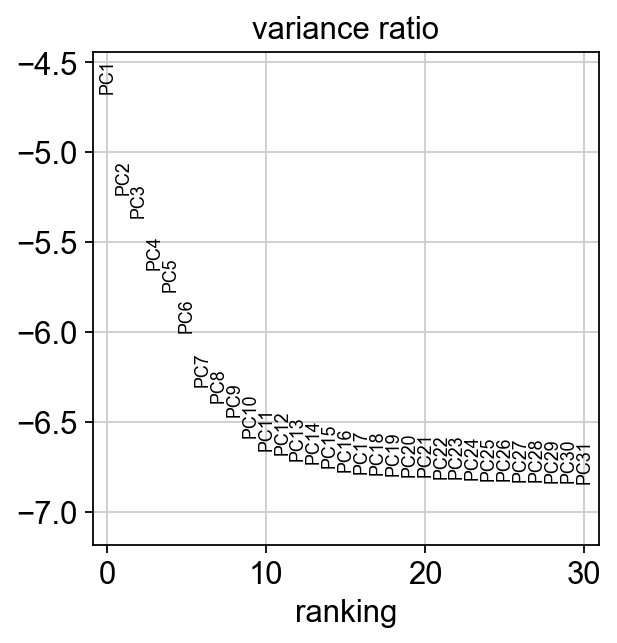

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


/opt/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'feature_types' as categorical


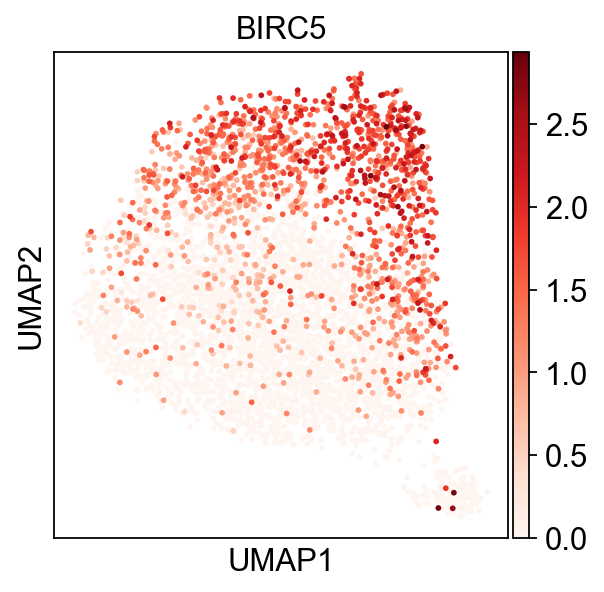

In [164]:
preprocess(example)
reduce_dimensions(example)
sc.pp.neighbors(example)
sc.tl.umap(example)
sc.pl.umap(example, color='BIRC5')

## Import data from GEO

Rule # 383: Every public dataset you ever download will be in some different random format.

This one is in a pretty clean .csv file, though:

Yalong Wang et al. **Single-cell transcriptome analysis reveals differential nutrient absorption functions in human intestine**. J Exp Med. 2020 Feb 3;217(2):e20191130. doi: 10.1084/jem.20191130.


https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE125970

In [516]:
txtdata = 'data/GEO_data/GSE125970_Wang/GSE125970_raw_UMIcounts.txt.gz'
countdata = pd.read_table(txtdata, index_col=0)


In [517]:
countdata[:3]

AAATGCCCAATCTGCA_Ileum-1_Enterocyte  \
GENE                                                
RP11-34P13.7                                    0   
FO538757.2                                      0   
AP006222.2                                      0   

              AACTCTTGTCTAGTCA_Ileum-1_Enterocyte  \
GENE                                                
RP11-34P13.7                                    0   
FO538757.2                                      0   
AP006222.2                                      0   

              AAGACCTCACGGACAA_Ileum-1_Enterocyte  \
GENE                                                
RP11-34P13.7                                    0   
FO538757.2                                      0   
AP006222.2                                      0   

              AAGCCGCGTCTTGCGG_Ileum-1_Enterocyte  \
GENE                                                
RP11-34P13.7                                    0   
FO538757.2                                      0   
AP006222.2                                      0   

              AAGTCTGGTTGTCTTT_Ileum-1_Enterocyte  \
GENE                                                
RP11-34P13.7                                    0   
FO538757.2                                      0   
AP006222.2                                      0   

              ACGAGGATCGGCCGAT_Ileum-1_Enterocyte  \
GENE                                                
RP11-34P13.7                                    0   
FO538757.2                                      0   
AP006222.2                                      0   

              ACGGCCAGTCTAAACC_Ileum-1_Enterocyte  \
GENE                                                
RP11-34P13.7                                    0   
FO538757.2                                      0   
AP006222.2                                      0   

              AGGCCGTTCGAGCCCA_Ileum-1_Enterocyte  \
GENE                                                
RP11-34P13.7                                    0   
FO538757.2                                      0   
AP006222.2                                      0   

              AGTGAGGGTCGGCTCA_Ileum-1_Enterocyte  \
GENE                                                
RP11-34P13.7                                    0   
FO538757.2                                      0   
AP006222.2                                      0   

              ATGAGGGAGGATATAC_Ileum-1_Enterocyte  ...  \
GENE                                               ...   
RP11-34P13.7                                    0  ...   
FO538757.2                                      0  ...   
AP006222.2                                      0  ...   

              TAGTTGGCAGTCCTTC_Rectum-2_Stem Cell  \
GENE                                                
RP11-34P13.7                                    0   
FO538757.2                                      0   
AP006222.2                                      0   

              TAGTTGGTCTGCCCTA_Rectum-2_Stem Cell  \
GENE                                                
RP11-34P13.7                                    0   
FO538757.2                                      0   
AP006222.2                                      0   

              TATCTCAGTGCGGTAA_Rectum-2_Stem Cell  \
GENE                                                
RP11-34P13.7                                    0   
FO538757.2                                      0   
AP006222.2                                      0   

              TATTACCCAATAACGA_Rectum-2_Stem Cell  \
GENE                                                
RP11-34P13.7                                    0   
FO538757.2                                      0   
AP006222.2                                      0   

              TCAATCTTCACGACTA_Rectum-2_Stem Cell  \
GENE                                                
RP11-34P13.7                                    0   
FO538757.2                                      1   
AP006222.2                                      0   


In [518]:
# Note that we need to swap rows and columns to be able to import annotations
countdata = countdata.T

normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['GUCA2B', 'GUCA2A', 'INSL5', 'REG4', 'FABP1', 'GCG', 'SST', 'DEFA6', 'SPINK4', 'FTH1', 'MALAT1', 'APOA1', 'CHGA', 'PHGR1', 'B2M', 'ZG16', 'MT1G', 'PYY', 'TFF3', 'TFF1', 'MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4', 'NTS', 'REG1A', 'REG3A', 'FABP6', 'DEFA5', 'APOA4']
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:03)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:09)


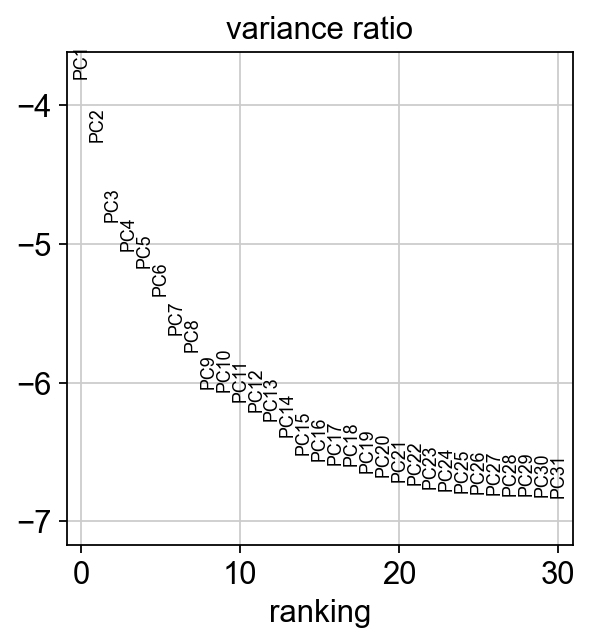

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


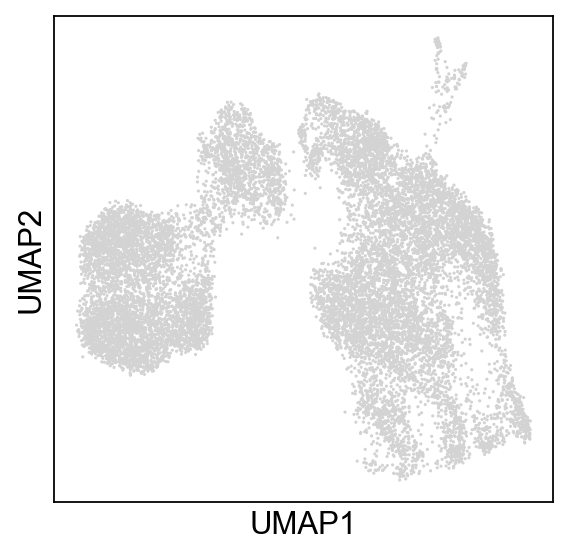

In [519]:
geodata = sc.AnnData(countdata)
geodata.X = scipy.sparse.csr_matrix(geodata.X.astype('int'))

preprocess(geodata)
reduce_dimensions(geodata)

sc.pp.neighbors(geodata)
sc.tl.umap(geodata)
sc.pl.umap(geodata)

/opt/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Sample_ID' as categorical


Index(['Sample_ID', 'CellType'], dtype='object')


/opt/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'CellType' as categorical


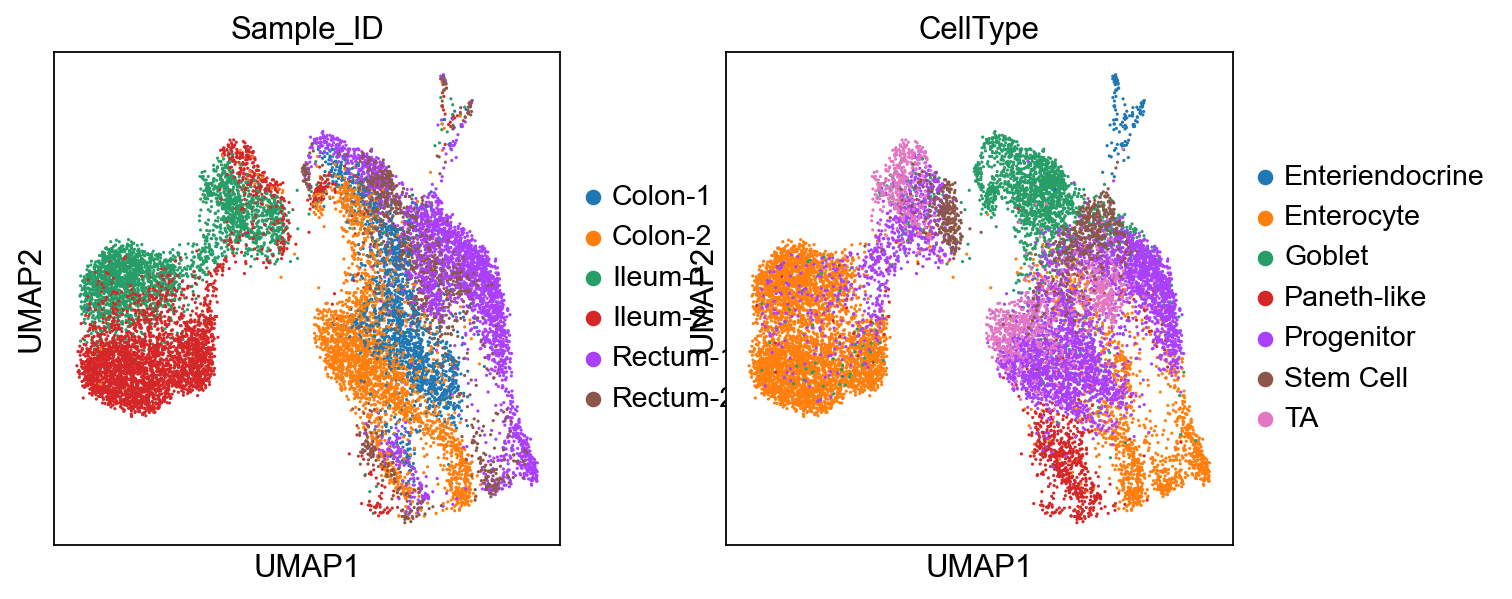

In [520]:
anno = pd.read_table('data/GEO_data/GSE125970_Wang/GSE125970_cell_info.txt.gz', index_col=0)
geodata.obs[anno.columns] = anno.loc[geodata.obs_names]

print(anno.columns)
sc.pl.umap(geodata, color=anno.columns)
